In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
x_start = -1.0
x_end = 1.0
t_start = 0.0
t_end = 20.0
cf = 0.1

In [4]:
#for Nx=401 file
Nx_f1 = 401
Nt_f1 = ((t_end - t_start)/(2*cf))*(Nx_f1 - 1) + 1
dx_f1 = (x_end - x_start)/(Nx_f1 - 1)
dt_f1 = np.around((t_end - t_start)/int(Nt_f1),5)
var_x_f1 = np.arange(x_start,x_end + dx_f1,dx_f1)
var_t_f1 = np.arange(t_start,t_end + dt_f1,dt_f1)

# for Nx = 801 file
Nx_f2 = 801
Nt_f2 = ((t_end - t_start)/(2*cf))*(Nx_f2 - 1) + 1
dx_f2 = (x_end - x_start)/(Nx_f2 - 1)
dt_f2 = np.around((t_end - t_start)/int(Nt_f2),5)
var_x_f2 = np.arange(x_start,x_end + dx_f2,dx_f2)
var_t_f2 = np.arange(t_start,t_end + dt_f2,dt_f2)

#for Nx = 1601 file

Nx_f3 = 1601
Nt_f3 = ((t_end - t_start)/(2*cf))*(Nx_f3 - 1) + 1
dx_f3 = (x_end - x_start)/(Nx_f3 - 1)
dt_f3 = np.around((t_end - t_start)/int(Nt_f3),6)
var_x_f3 = np.arange(x_start,x_end + dx_f3,dx_f3)
var_t_f3 = np.arange(t_start,t_end + dt_f3,dt_f3)

In [5]:
# 1 time unit = 1000 iterations for dt=0.001
# For each crossing it takes 2 time units since domain is (-1,+1)
# Thus, for wave to reach initial state is 4 time units
two_full_crossing_time = ( (x_end) - (x_start) )
two_full_crossing_iter_f1 = (np.where(np.isclose(two_full_crossing_time,var_t_f1,1E-5))[0])
two_full_crossing_iter_f2 = (np.where(np.isclose(two_full_crossing_time,var_t_f2,1E-5))[0])
two_full_crossing_iter_f3 = (np.where(np.isclose(two_full_crossing_time,var_t_f3,1E-5))[0])
total_crossings = int(t_end/two_full_crossing_time)
crossing_times = np.zeros(total_crossings)

for i in range (1,total_crossings+1):
    crossing_times[i-1] = var_t_f1[int(i*two_full_crossing_iter_f1)]

In [6]:
phi_f1 = np.zeros((total_crossings+1,Nx_f1))
phi_dot_f1 = np.zeros((total_crossings+1,Nx_f1))

phi_f2 = np.zeros((total_crossings+1,Nx_f2))
phi_dot_f2 = np.zeros((total_crossings+1,Nx_f2))

phi_f3 = np.zeros((total_crossings+1,Nx_f3))
phi_dot_f3 = np.zeros((total_crossings+1,Nx_f3))

In [7]:
# # Read data only after two full crossings
# j = 0
# for i in range (0,int(Nt_f1),int(two_full_crossing_iter_f1)):
#     phi_f1[j] = np.load("u_result,Nx=401,t=(0.0,20.0),x=(-1.0,1.0).npy")[:,0][i]
#     phi_dot_f1[j] = np.load("u_result,Nx=401,t=(0.0,20.0),x=(-1.0,1.0).npy")[:,1][i]
#     j = j+1
    
# j = 0
# for i in range (0,int(Nt_f2),int(two_full_crossing_iter_f2)):
#     phi_f2[j] = np.load("u_result,Nx=801,t=(0.0,20.0),x=(-1.0,1.0).npy")[:,0][i]
#     phi_dot_f2[j] = np.load("u_result,Nx=801,t=(0.0,20.0),x=(-1.0,1.0).npy")[:,1][i]
#     j = j+1
    
# j = 0
# for i in range (0,int(Nt_f3),int(two_full_crossing_iter_f3)):
#     phi_f3[j] = np.load("u_result,Nx=1601,t=(0.0,20.0),x=(-1.0,1.0).npy")[:,0][i]
#     phi_dot_f3[j] = np.load("u_result,Nx=1601,t=(0.0,20.0),x=(-1.0,1.0).npy")[:,1][i]
#     j = j+1

In [8]:
# np.save("phi_f1,Nx=401,t=(0.0,20.0),x=(-1.0,1.0).npy",phi_f1)
# np.save("phi_dot_f1,Nx=401,t=(0.0,20.0),x=(-1.0,1.0).npy",phi_dot_f1)

# np.save("phi_f2,Nx=801,t=(0.0,20.0),x=(-1.0,1.0).npy",phi_f2)
# np.save("phi_dot_f2,Nx=801,t=(0.0,20.0),x=(-1.0,1.0).npy",phi_dot_f2)

# np.save("phi_f3,Nx=1601,t=(0.0,20.0),x=(-1.0,1.0).npy",phi_f3)
# np.save("phi_dot_f3,Nx=1601,t=(0.0,20.0),x=(-1.0,1.0).npy",phi_dot_f3)

In [9]:
phi_f1 = np.load("phi_f1,Nx=401,t=(0.0,20.0),x=(-1.0,1.0).npy")
phi_dot_f1 = np.load("phi_dot_f1,Nx=401,t=(0.0,20.0),x=(-1.0,1.0).npy")

phi_f2 = np.load("phi_f2,Nx=801,t=(0.0,20.0),x=(-1.0,1.0).npy")
phi_dot_f2 = np.load("phi_dot_f2,Nx=801,t=(0.0,20.0),x=(-1.0,1.0).npy")

phi_f3 = np.load("phi_f3,Nx=1601,t=(0.0,20.0),x=(-1.0,1.0).npy")
phi_dot_f3 = np.load("phi_dot_f3,Nx=1601,t=(0.0,20.0),x=(-1.0,1.0).npy")

In [10]:
#Error
error_f1 = np.zeros((total_crossings,Nx_f1))
error_f2 = np.zeros((total_crossings,Nx_f2))
error_f3 = np.zeros((total_crossings,Nx_f3))

In [11]:
for i in range (total_crossings):
    error_f1[i] = (phi_f1[i+1] - phi_f1[0])/dt_f1**2
    error_f2[i] = (phi_f2[i+1] - phi_f2[0])/dt_f2**2
    error_f3[i] = (phi_f3[i+1] - phi_f3[0])/dt_f3**2

In [12]:
def plots1(title,x_label,y_label,x_param1,y_param1,x_param2,y_param2,x_param3,y_param3,Nx,dt):
    fig_dpi = 150
    fig, ax = plt.subplots(figsize=(2560/fig_dpi,1440/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=18)
    plt.xlabel(x_label,fontsize=16)
    plt.ylabel(y_label,fontsize=16)
    plt.plot(x_param1,y_param1)
    plt.plot(x_param2,y_param2)
    plt.plot(x_param3,y_param3)
    plt.legend(Nx,title="Spatial resolution Nx:",loc='upper right')
    plt.text(0.02, 0.90, ("dt =",dt),
             transform=ax.transAxes,fontsize=14)
    plt.show()

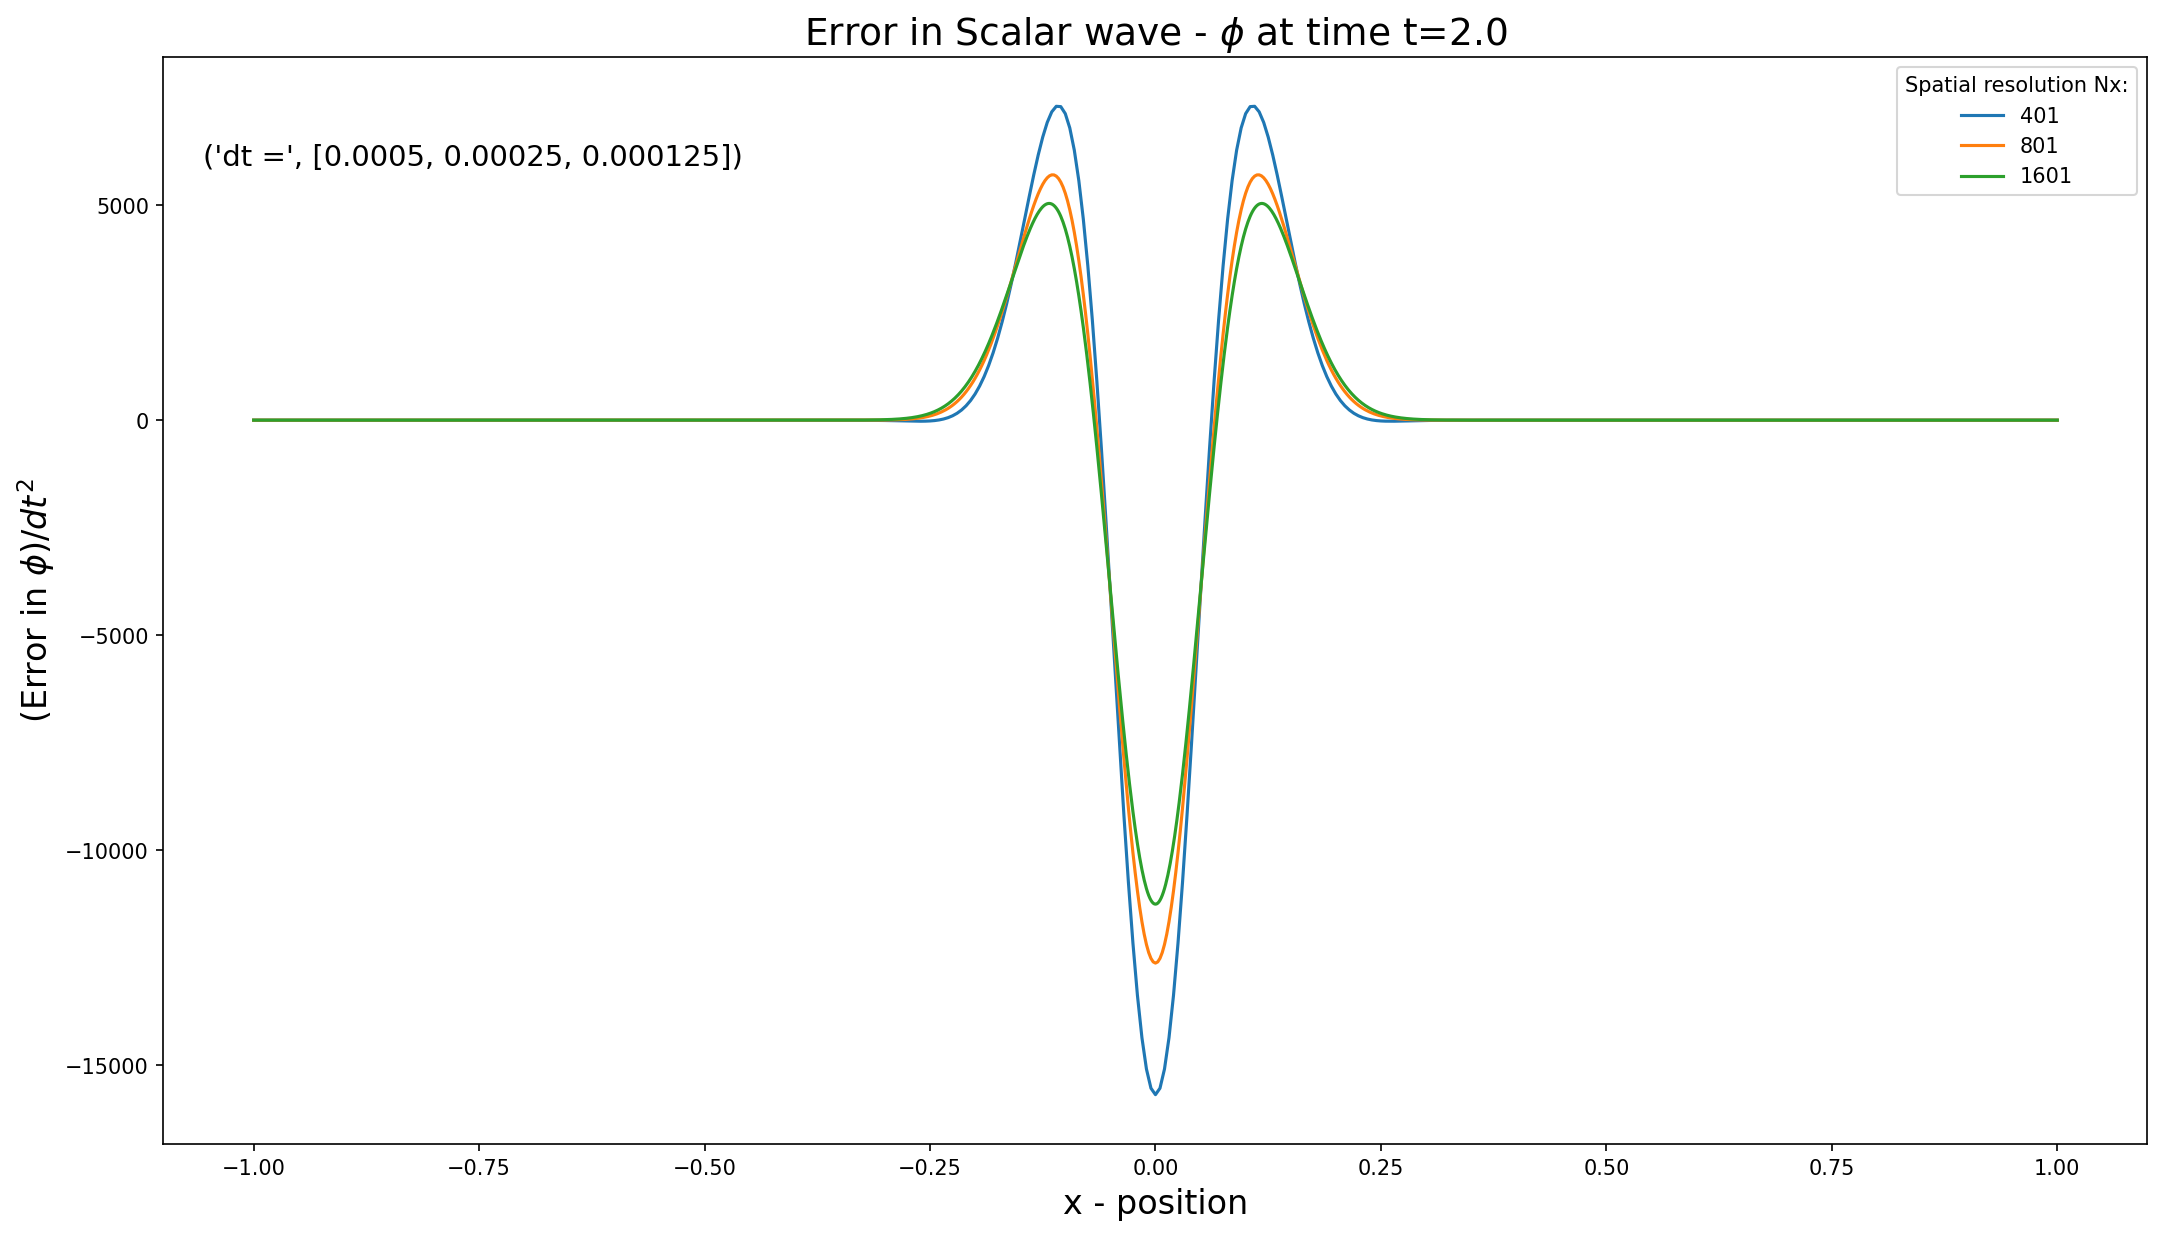

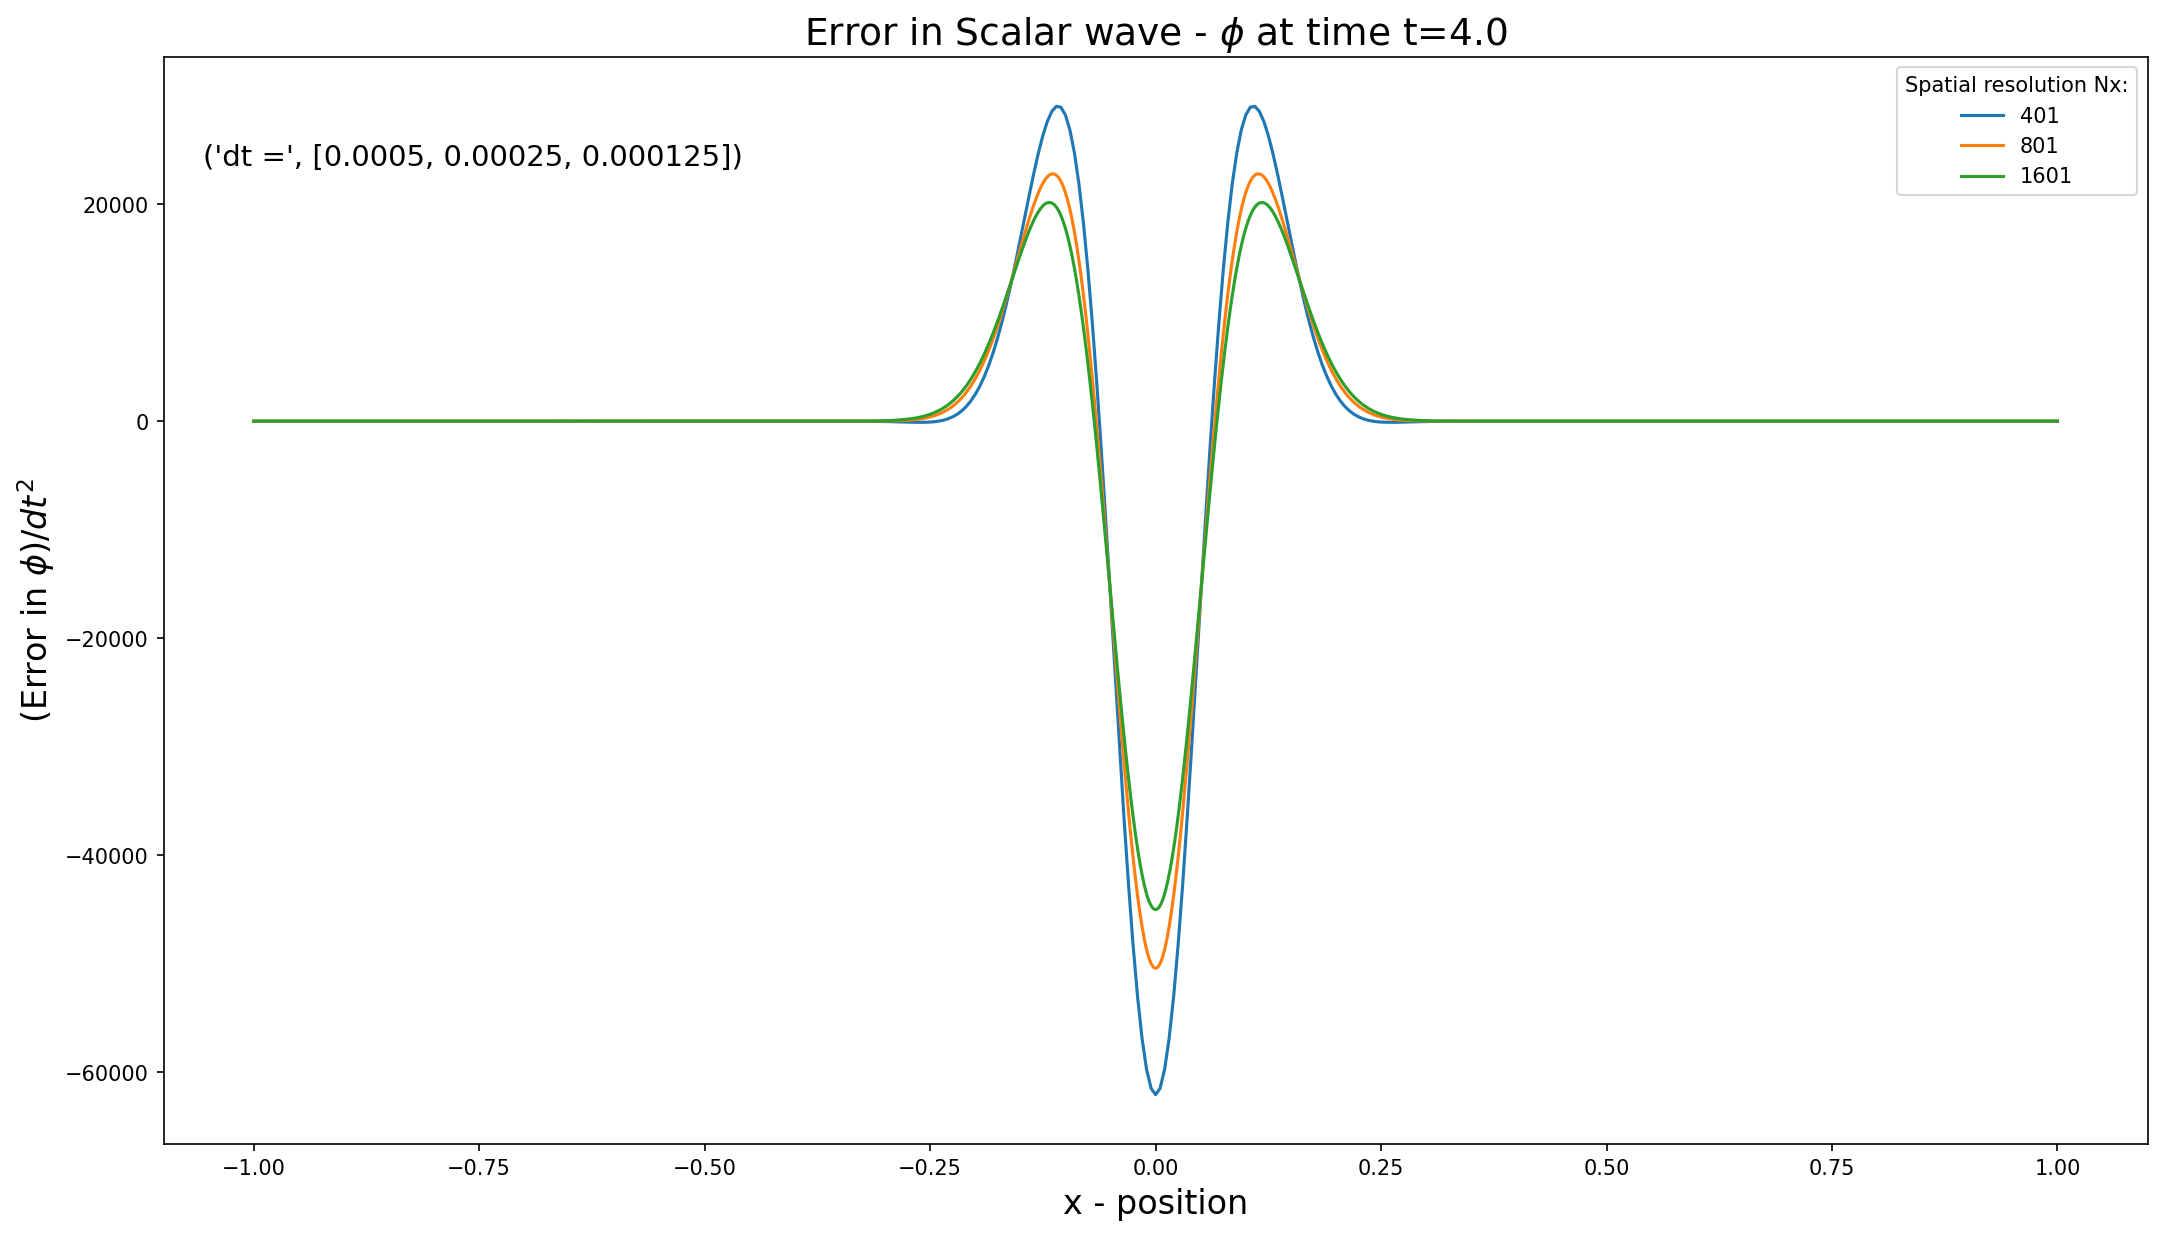

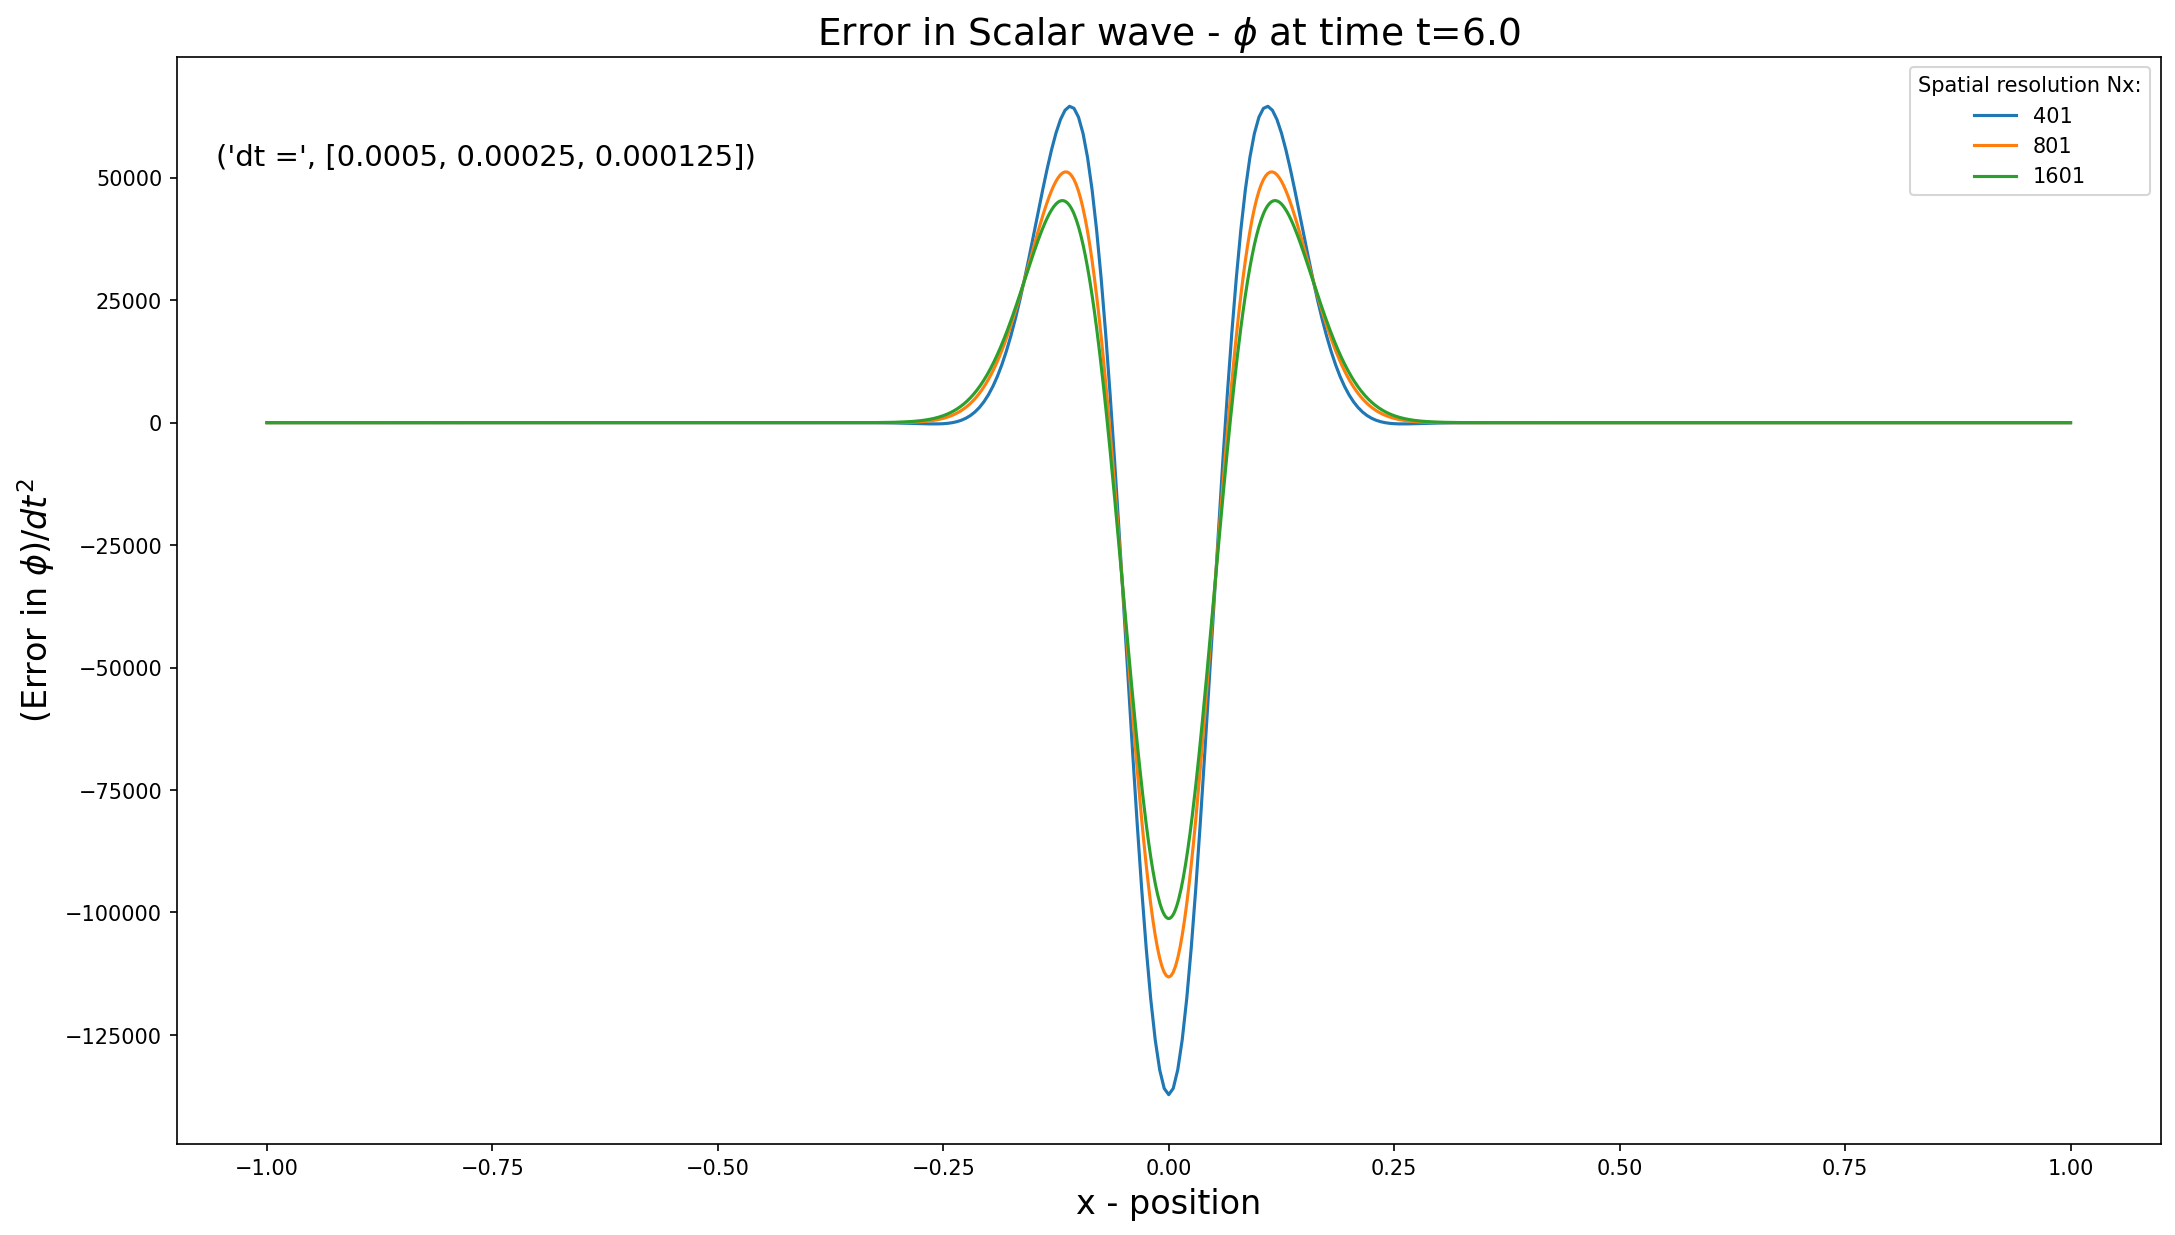

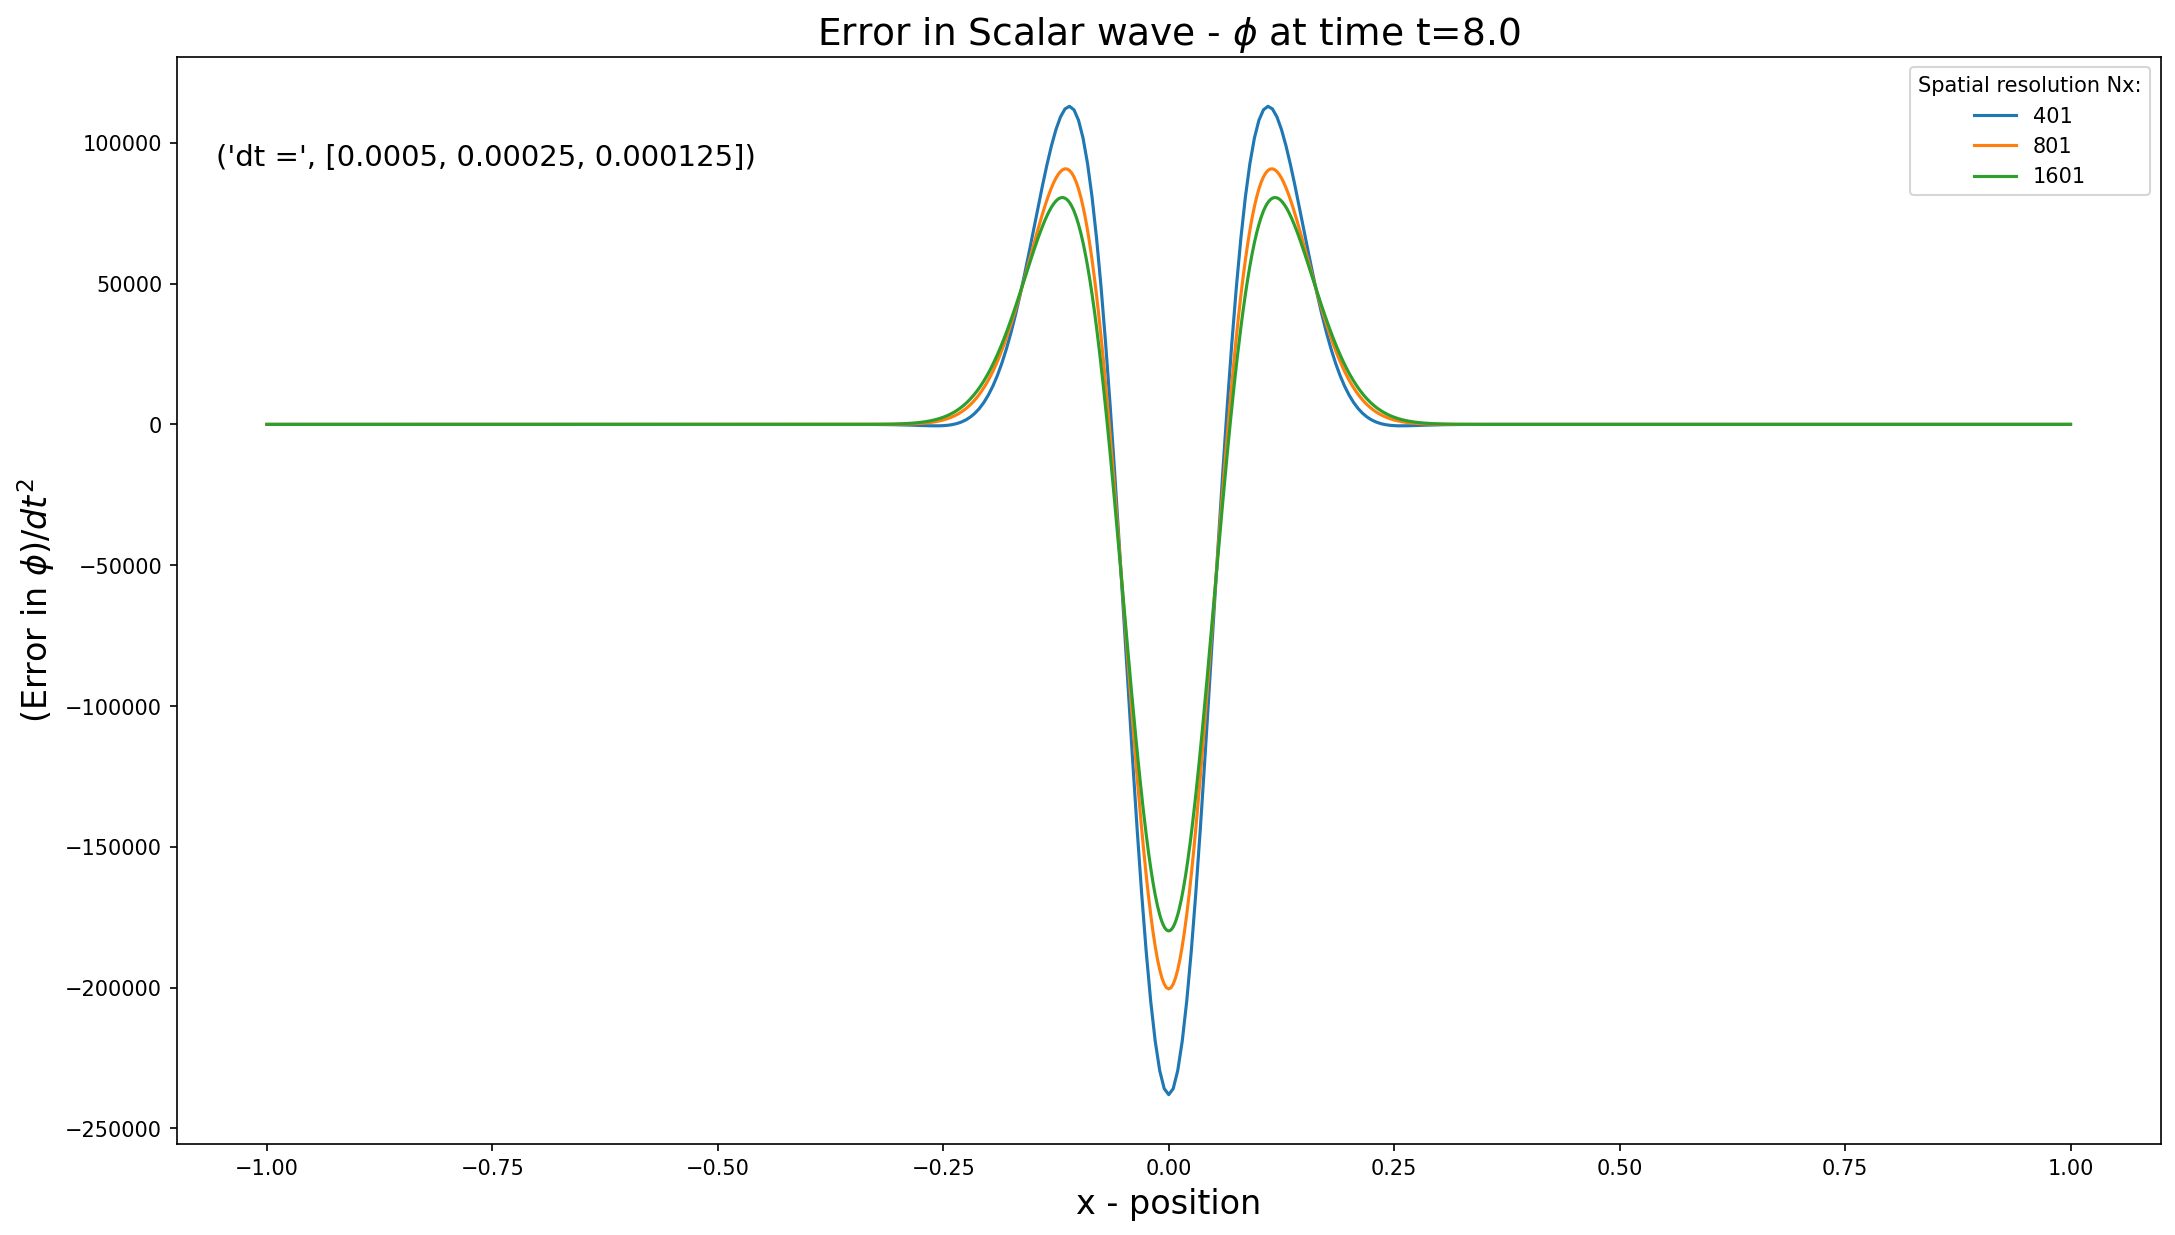

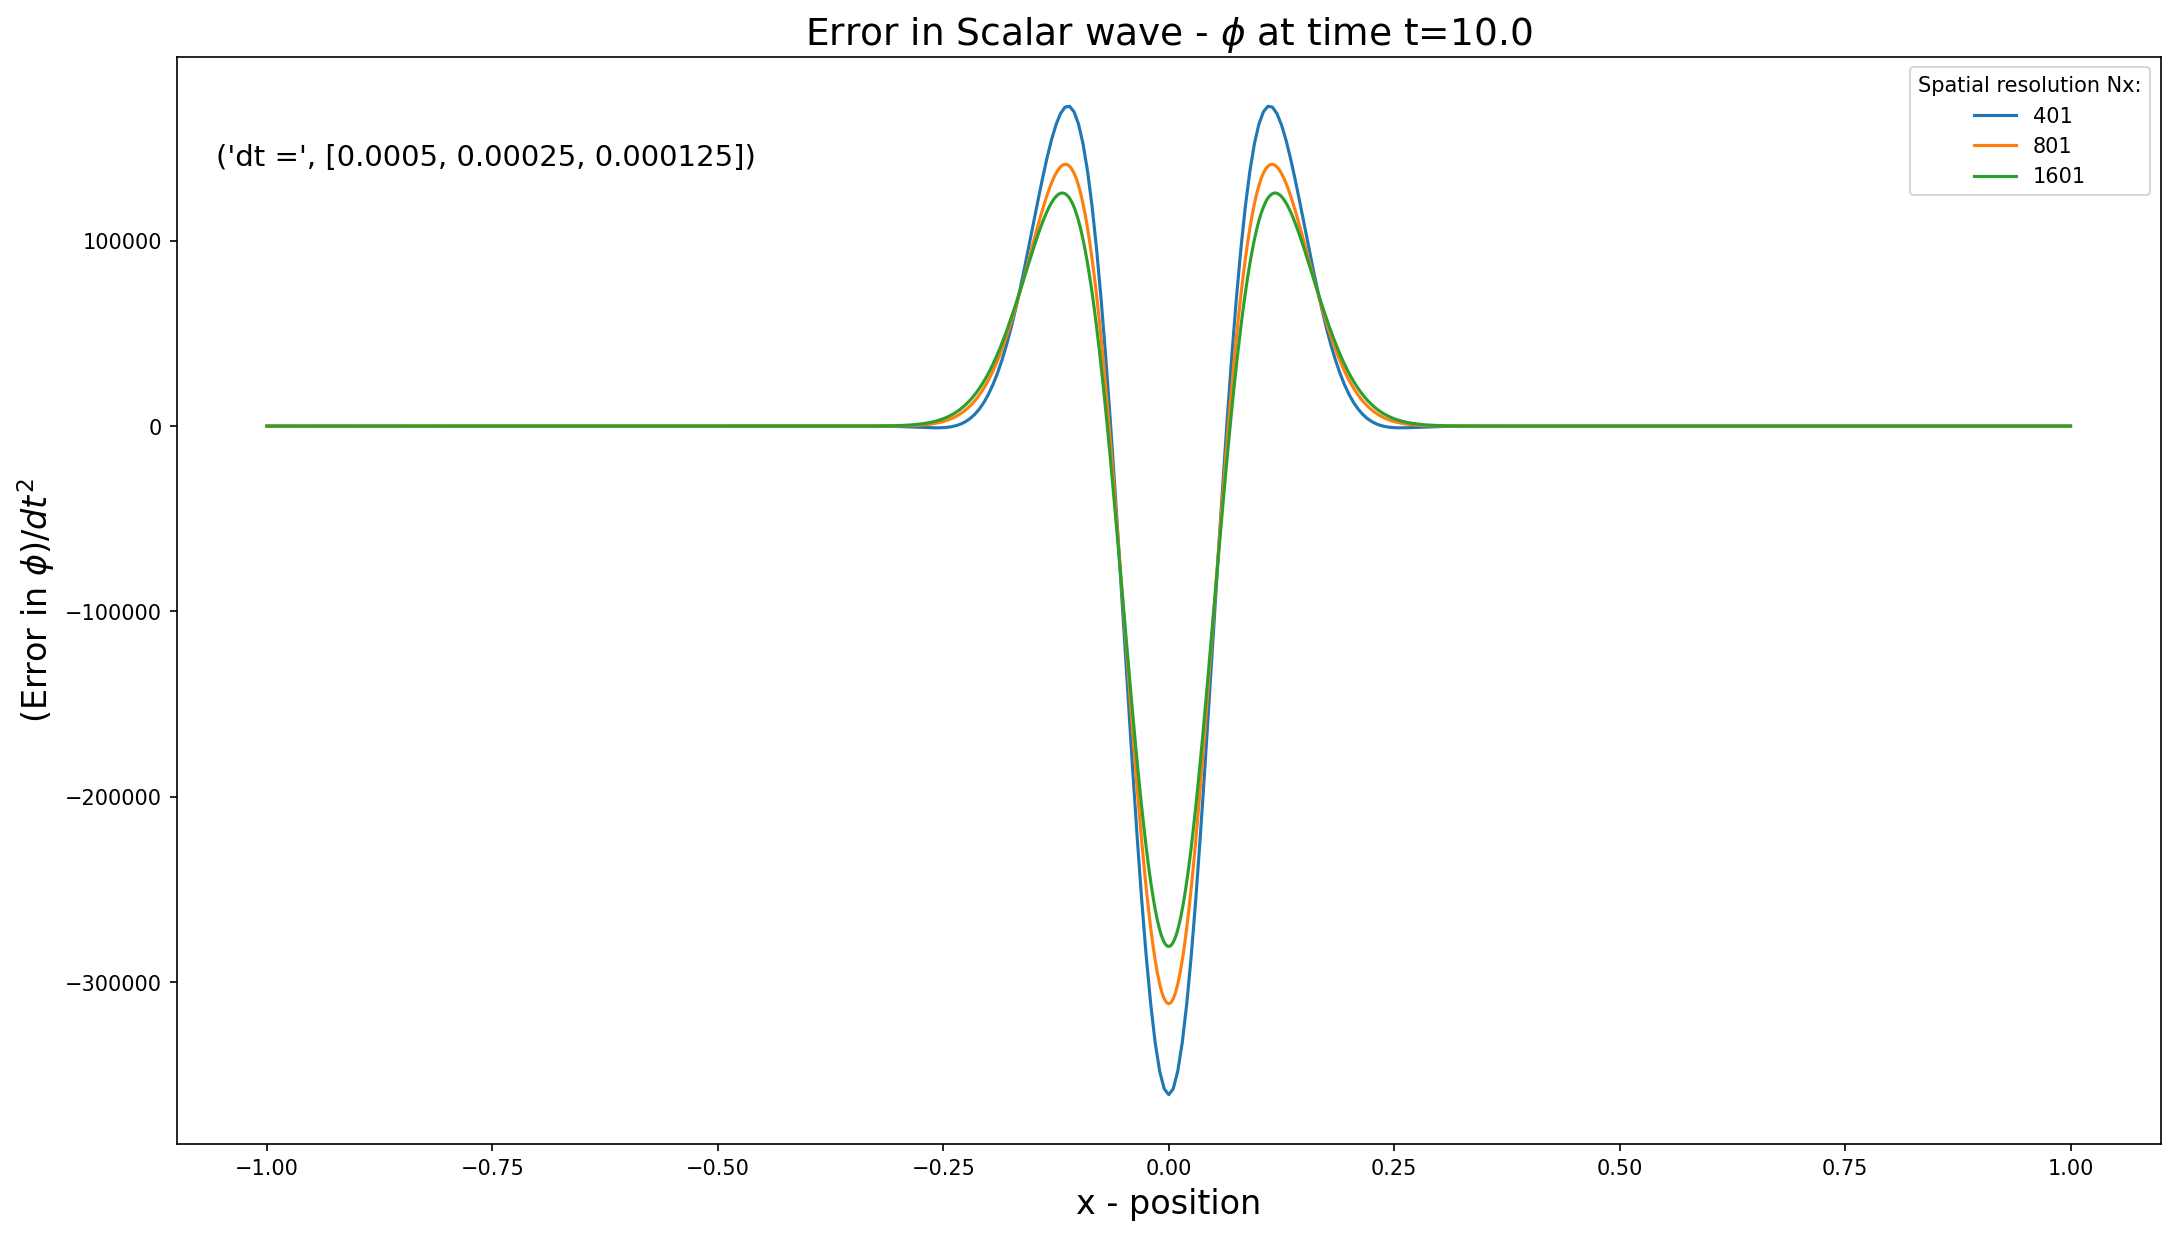

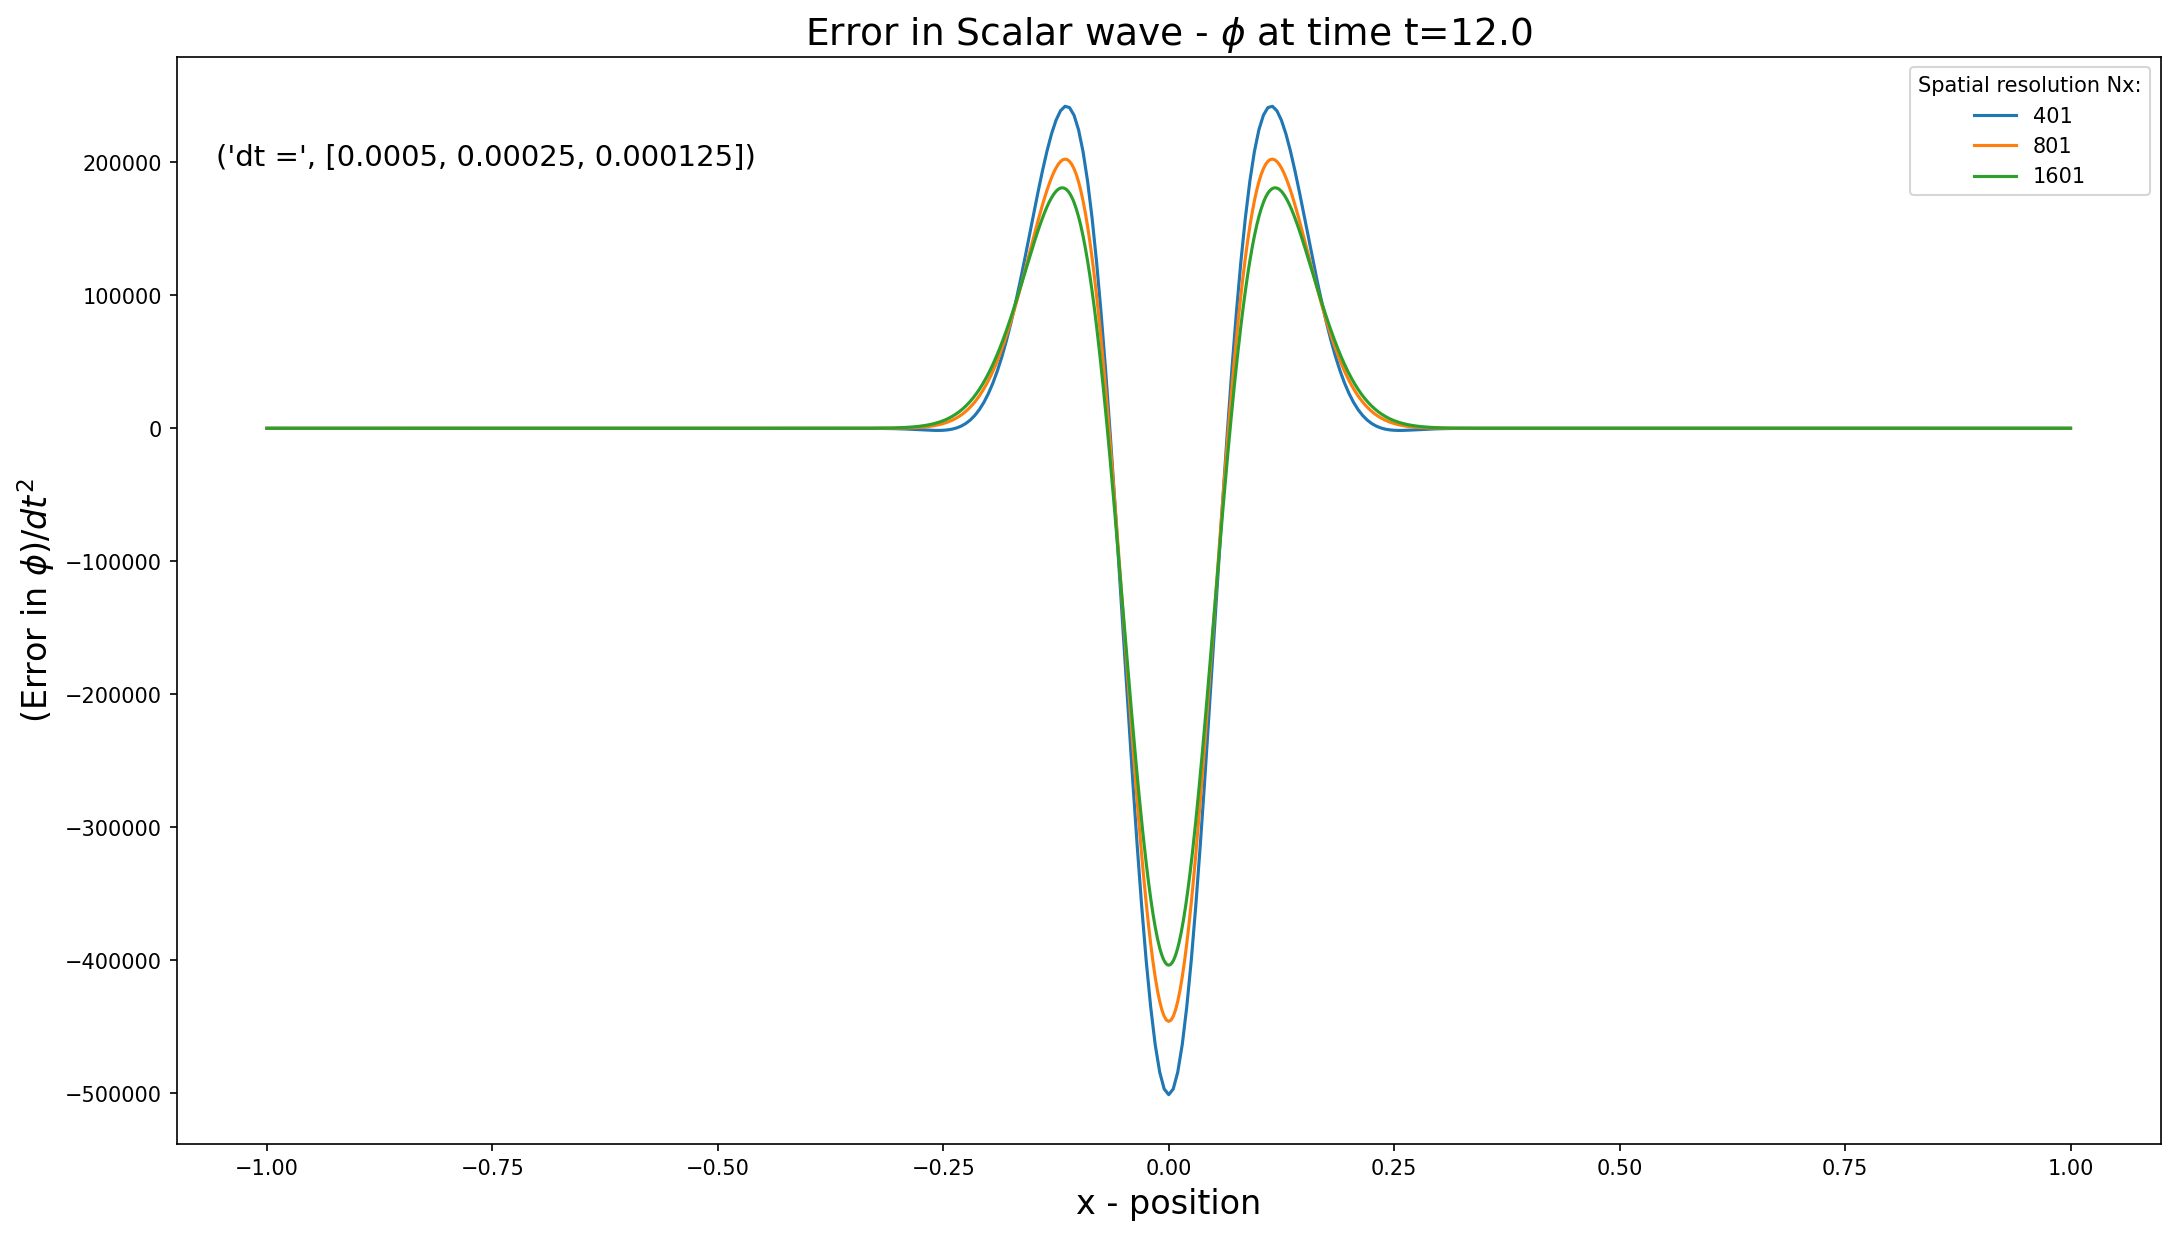

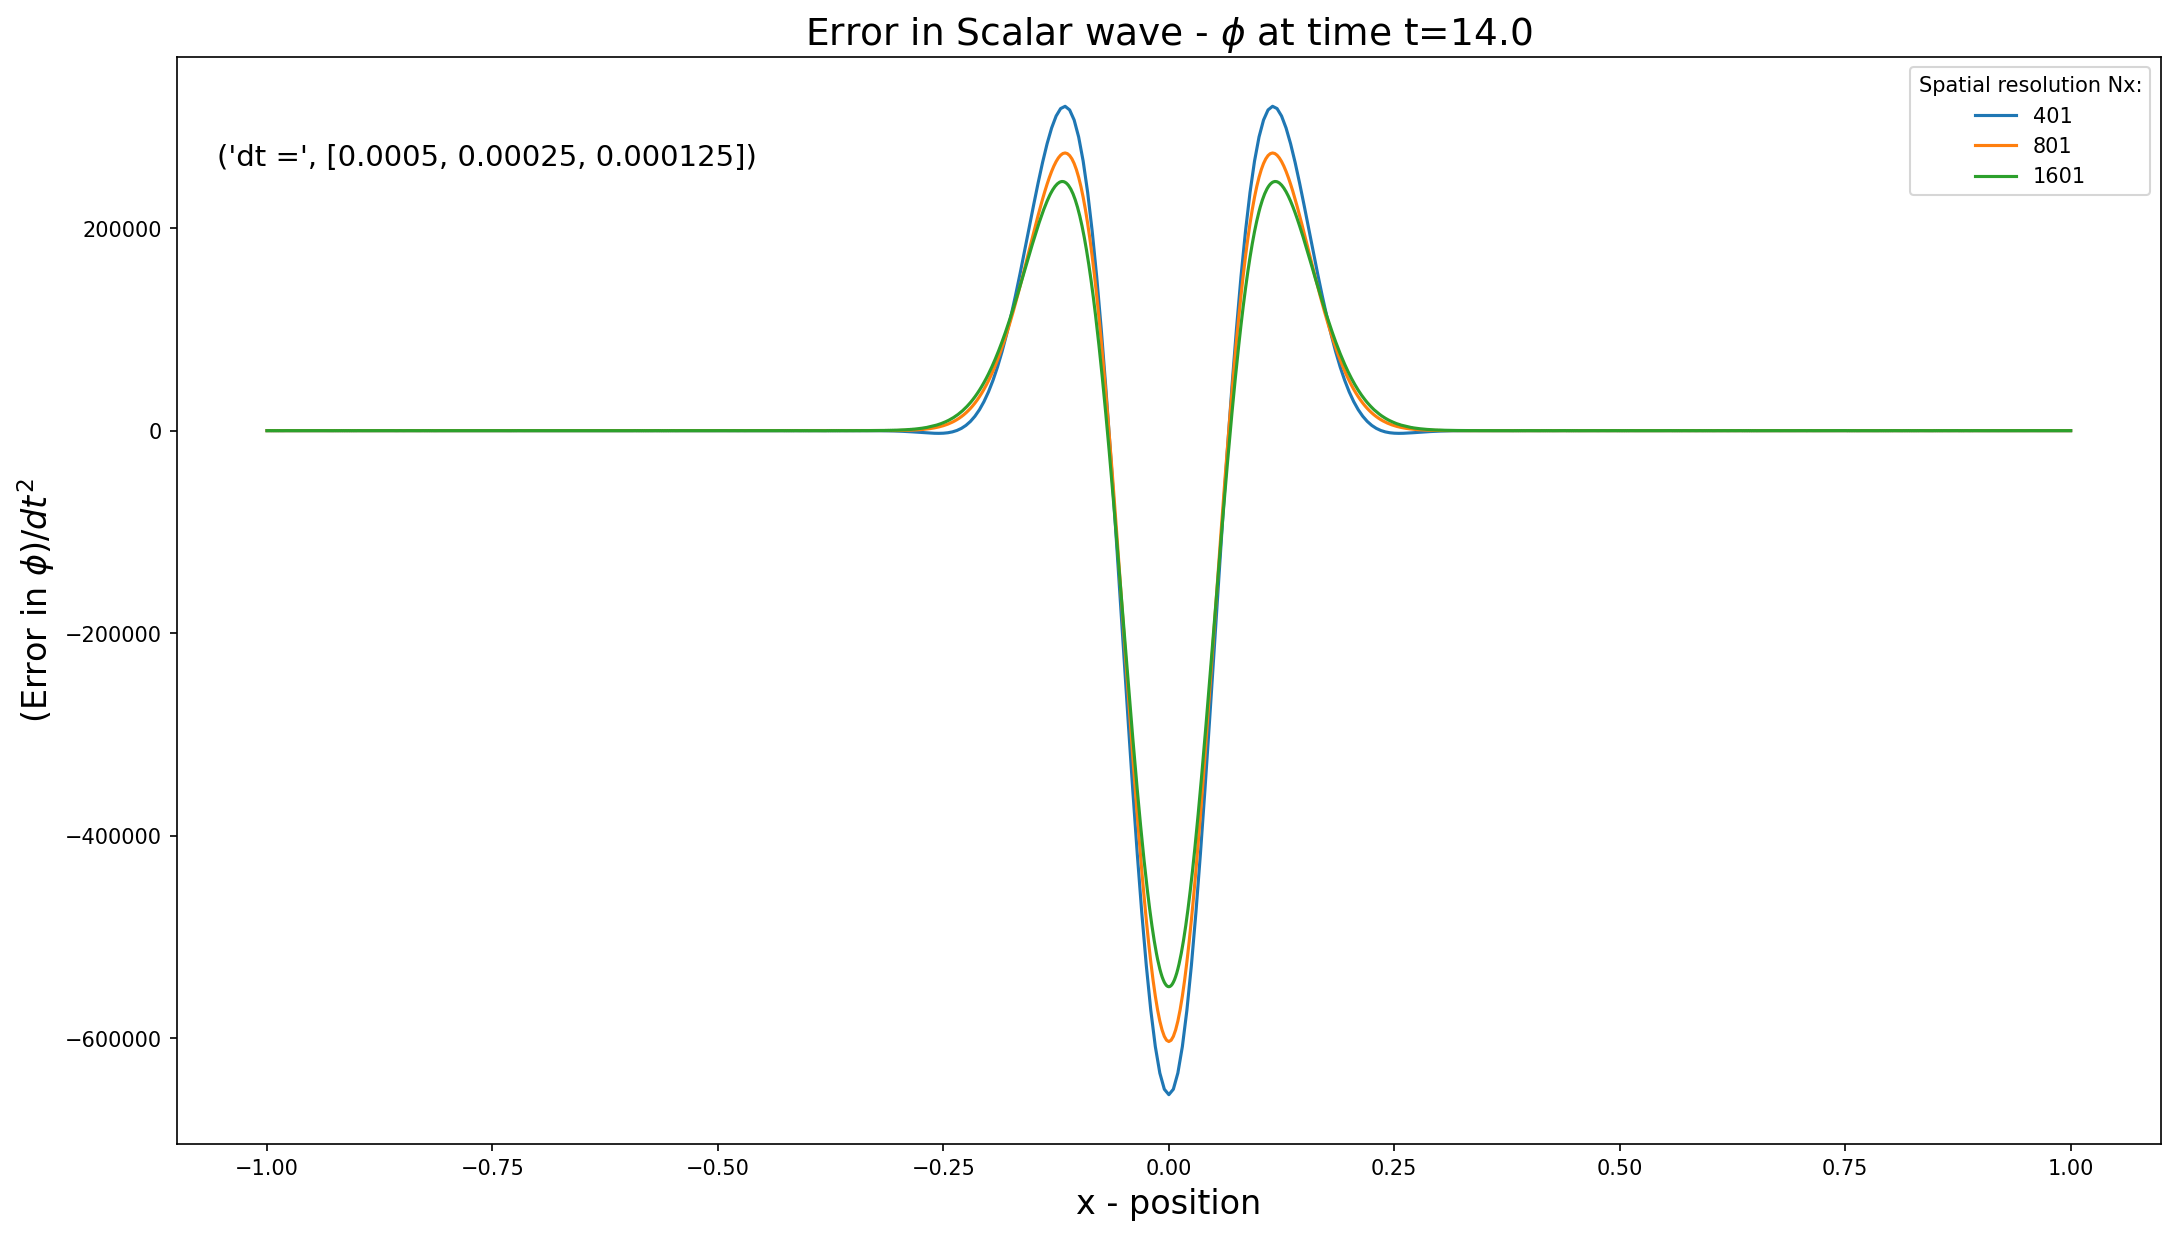

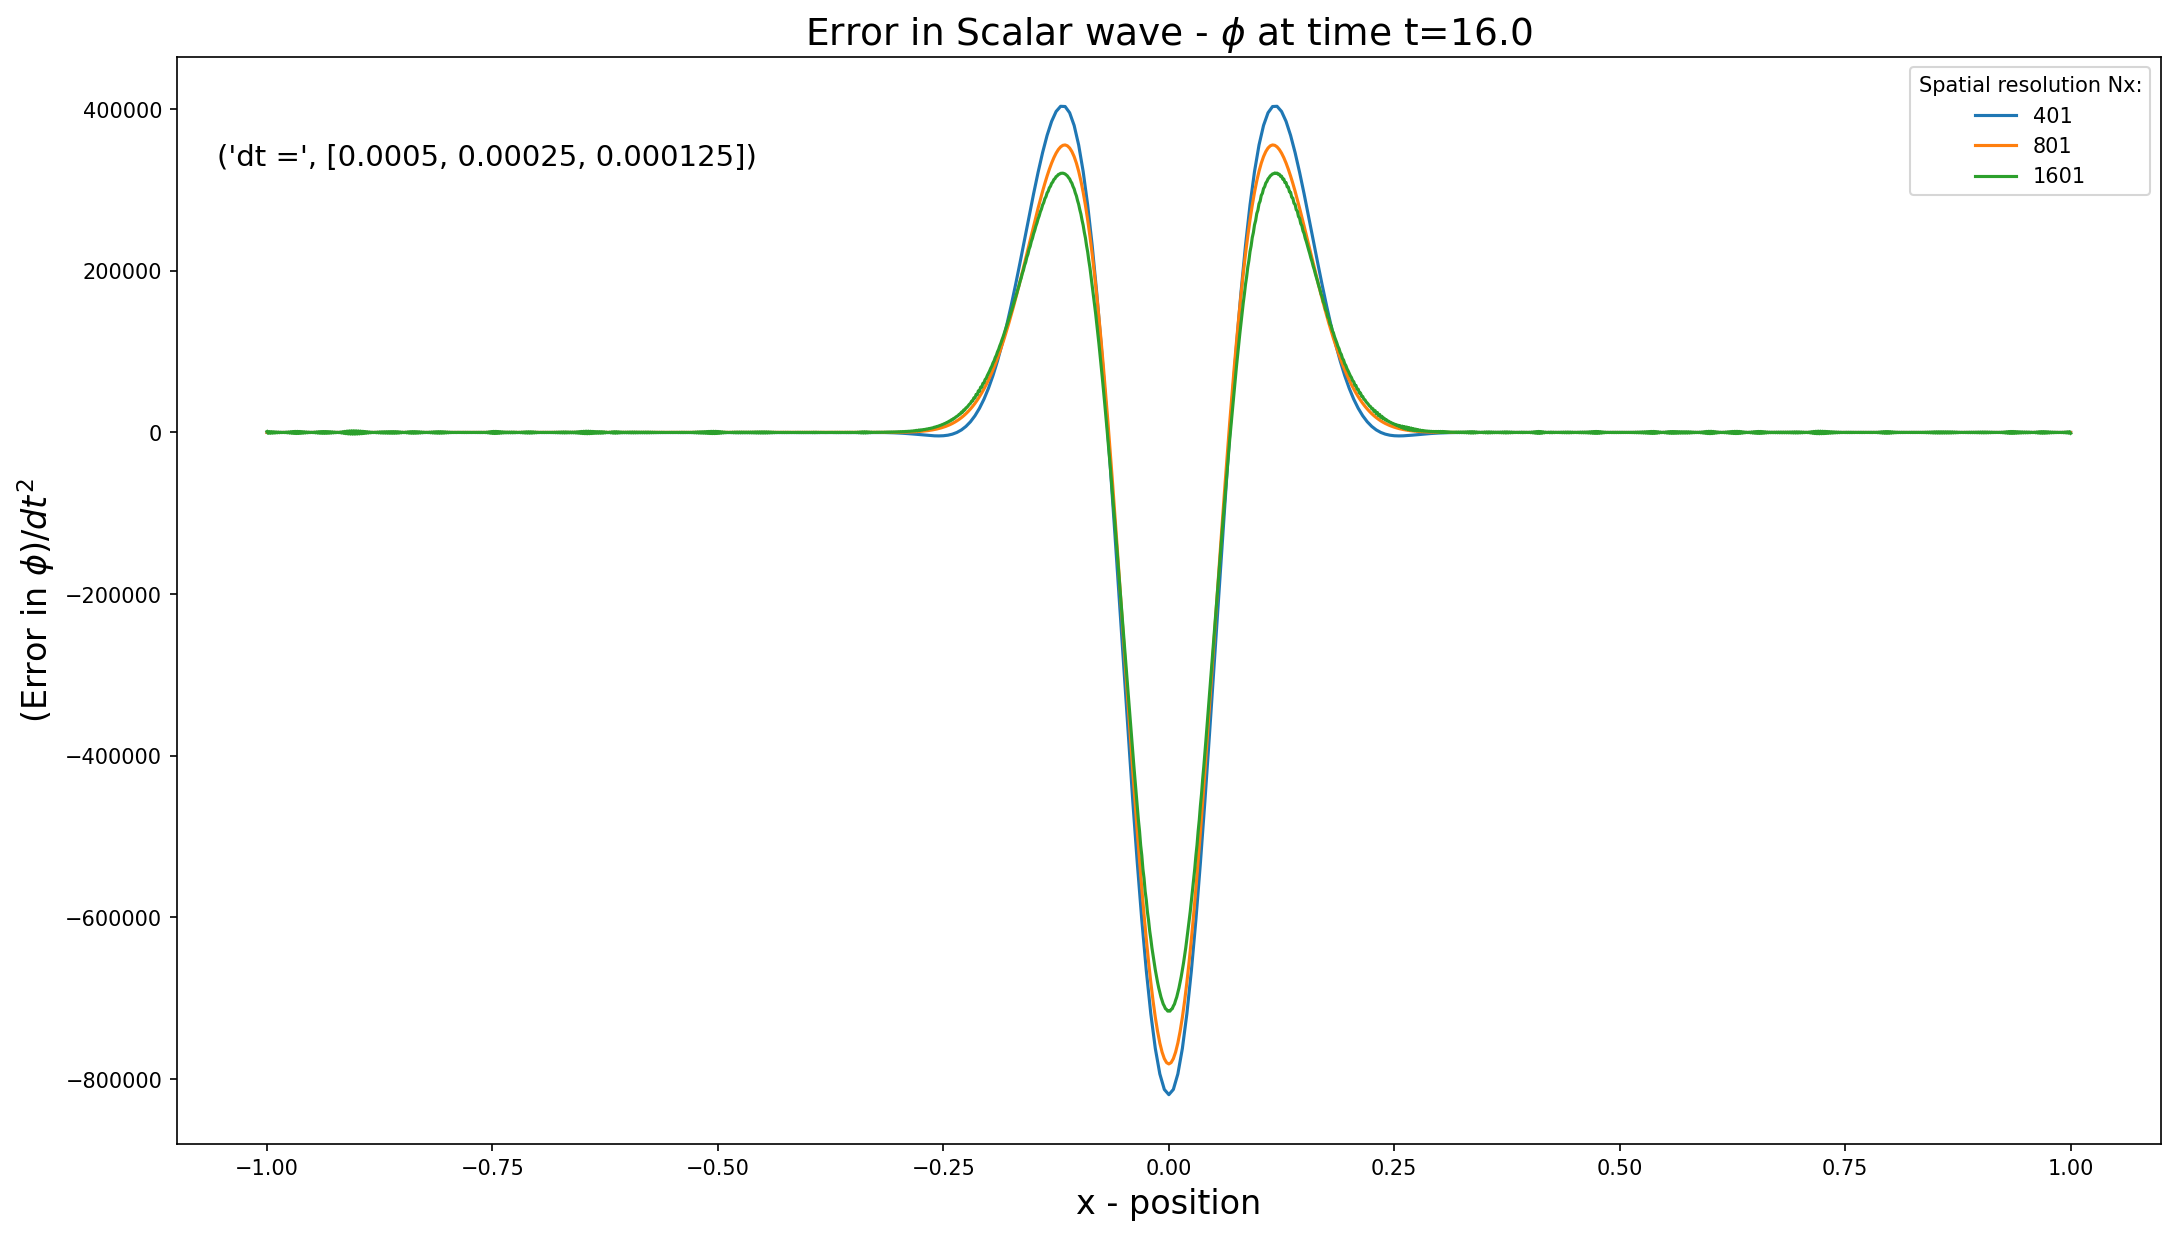

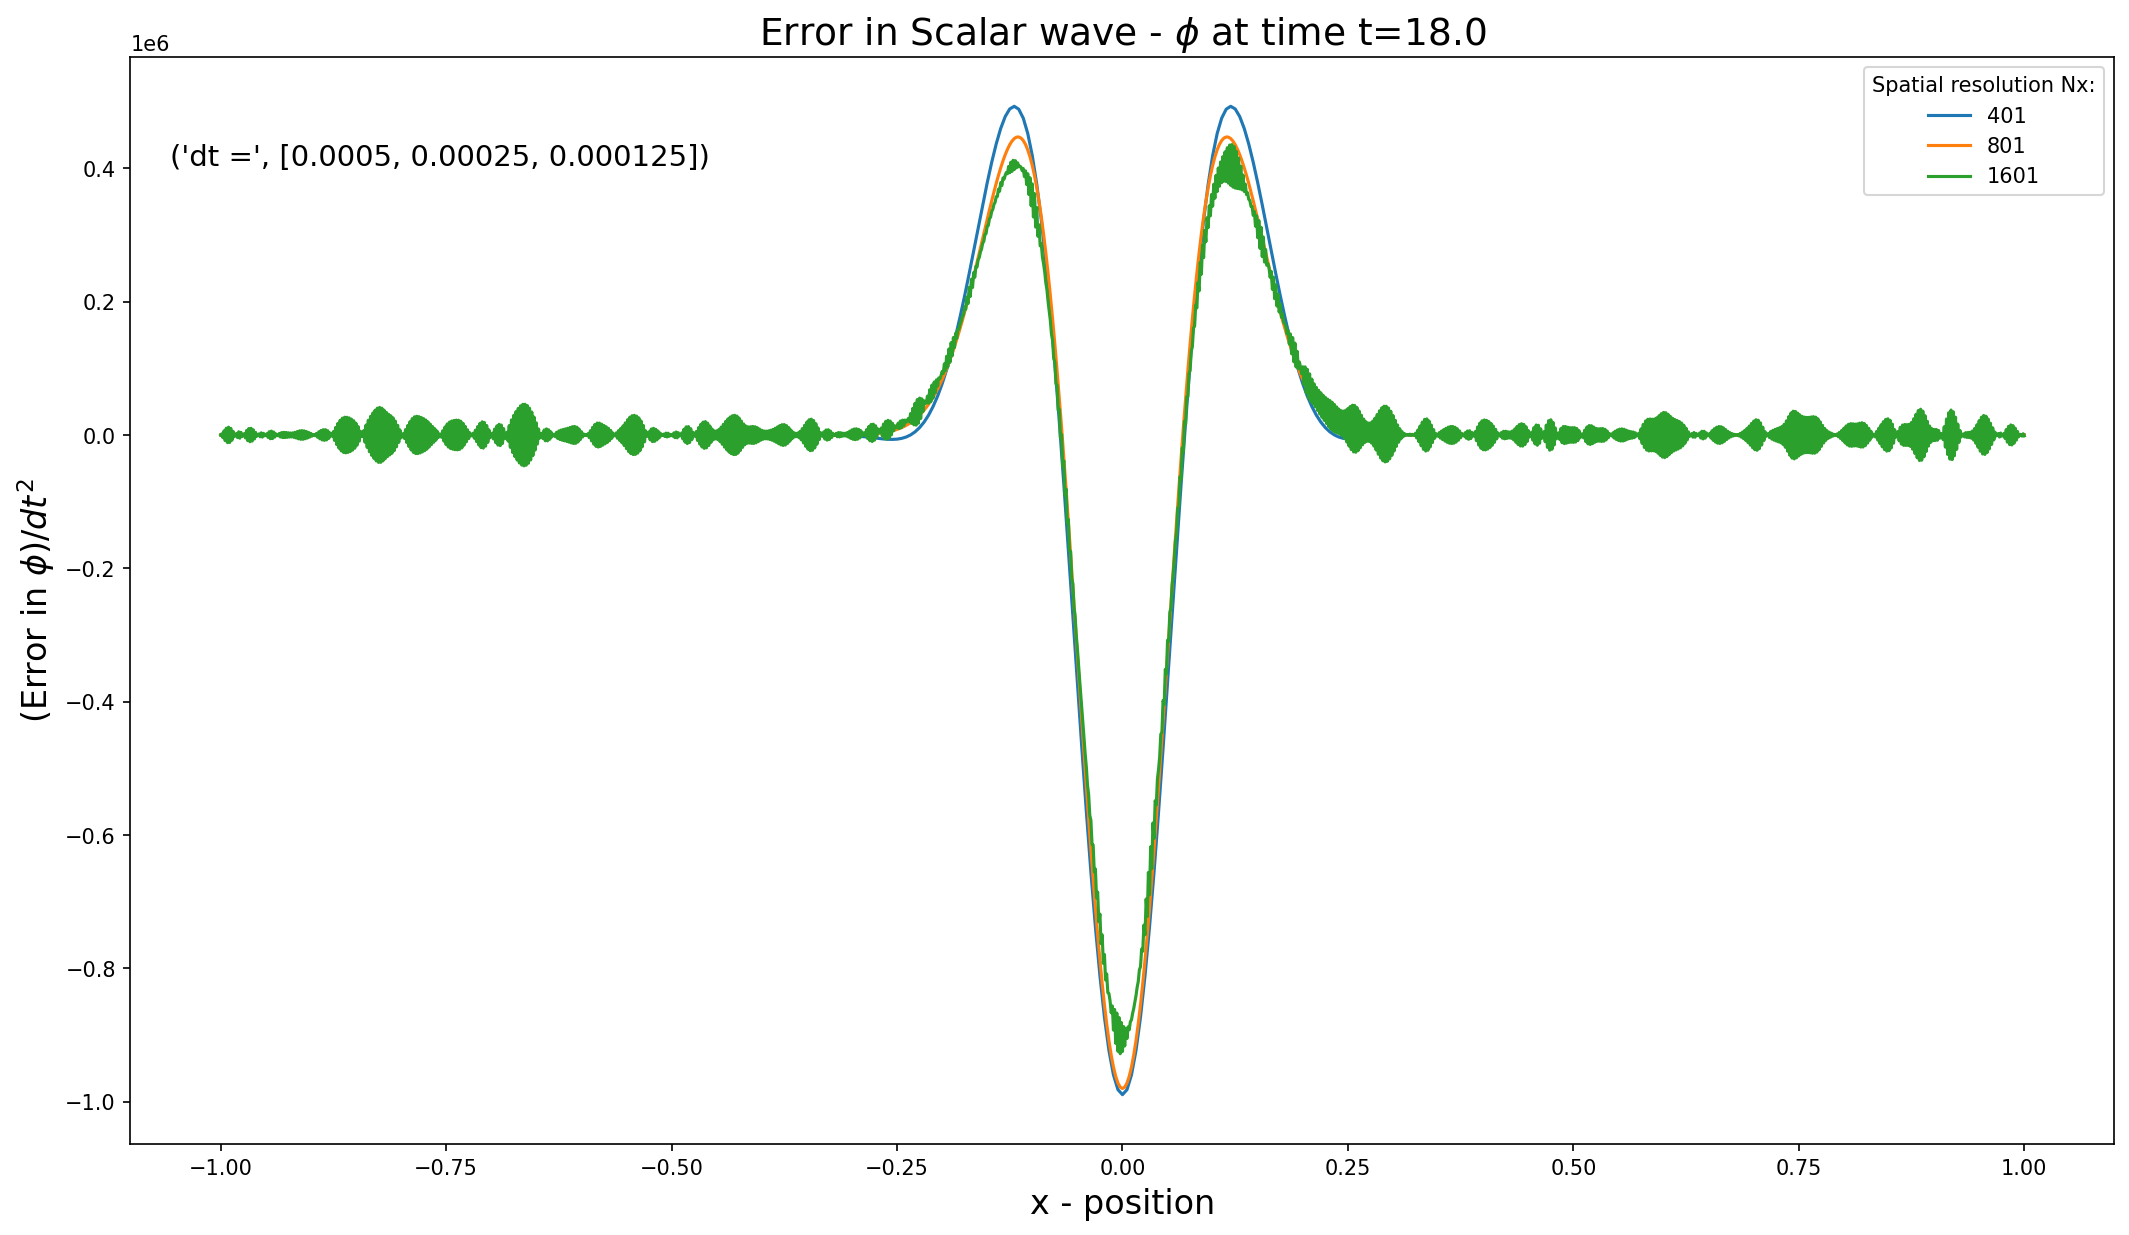

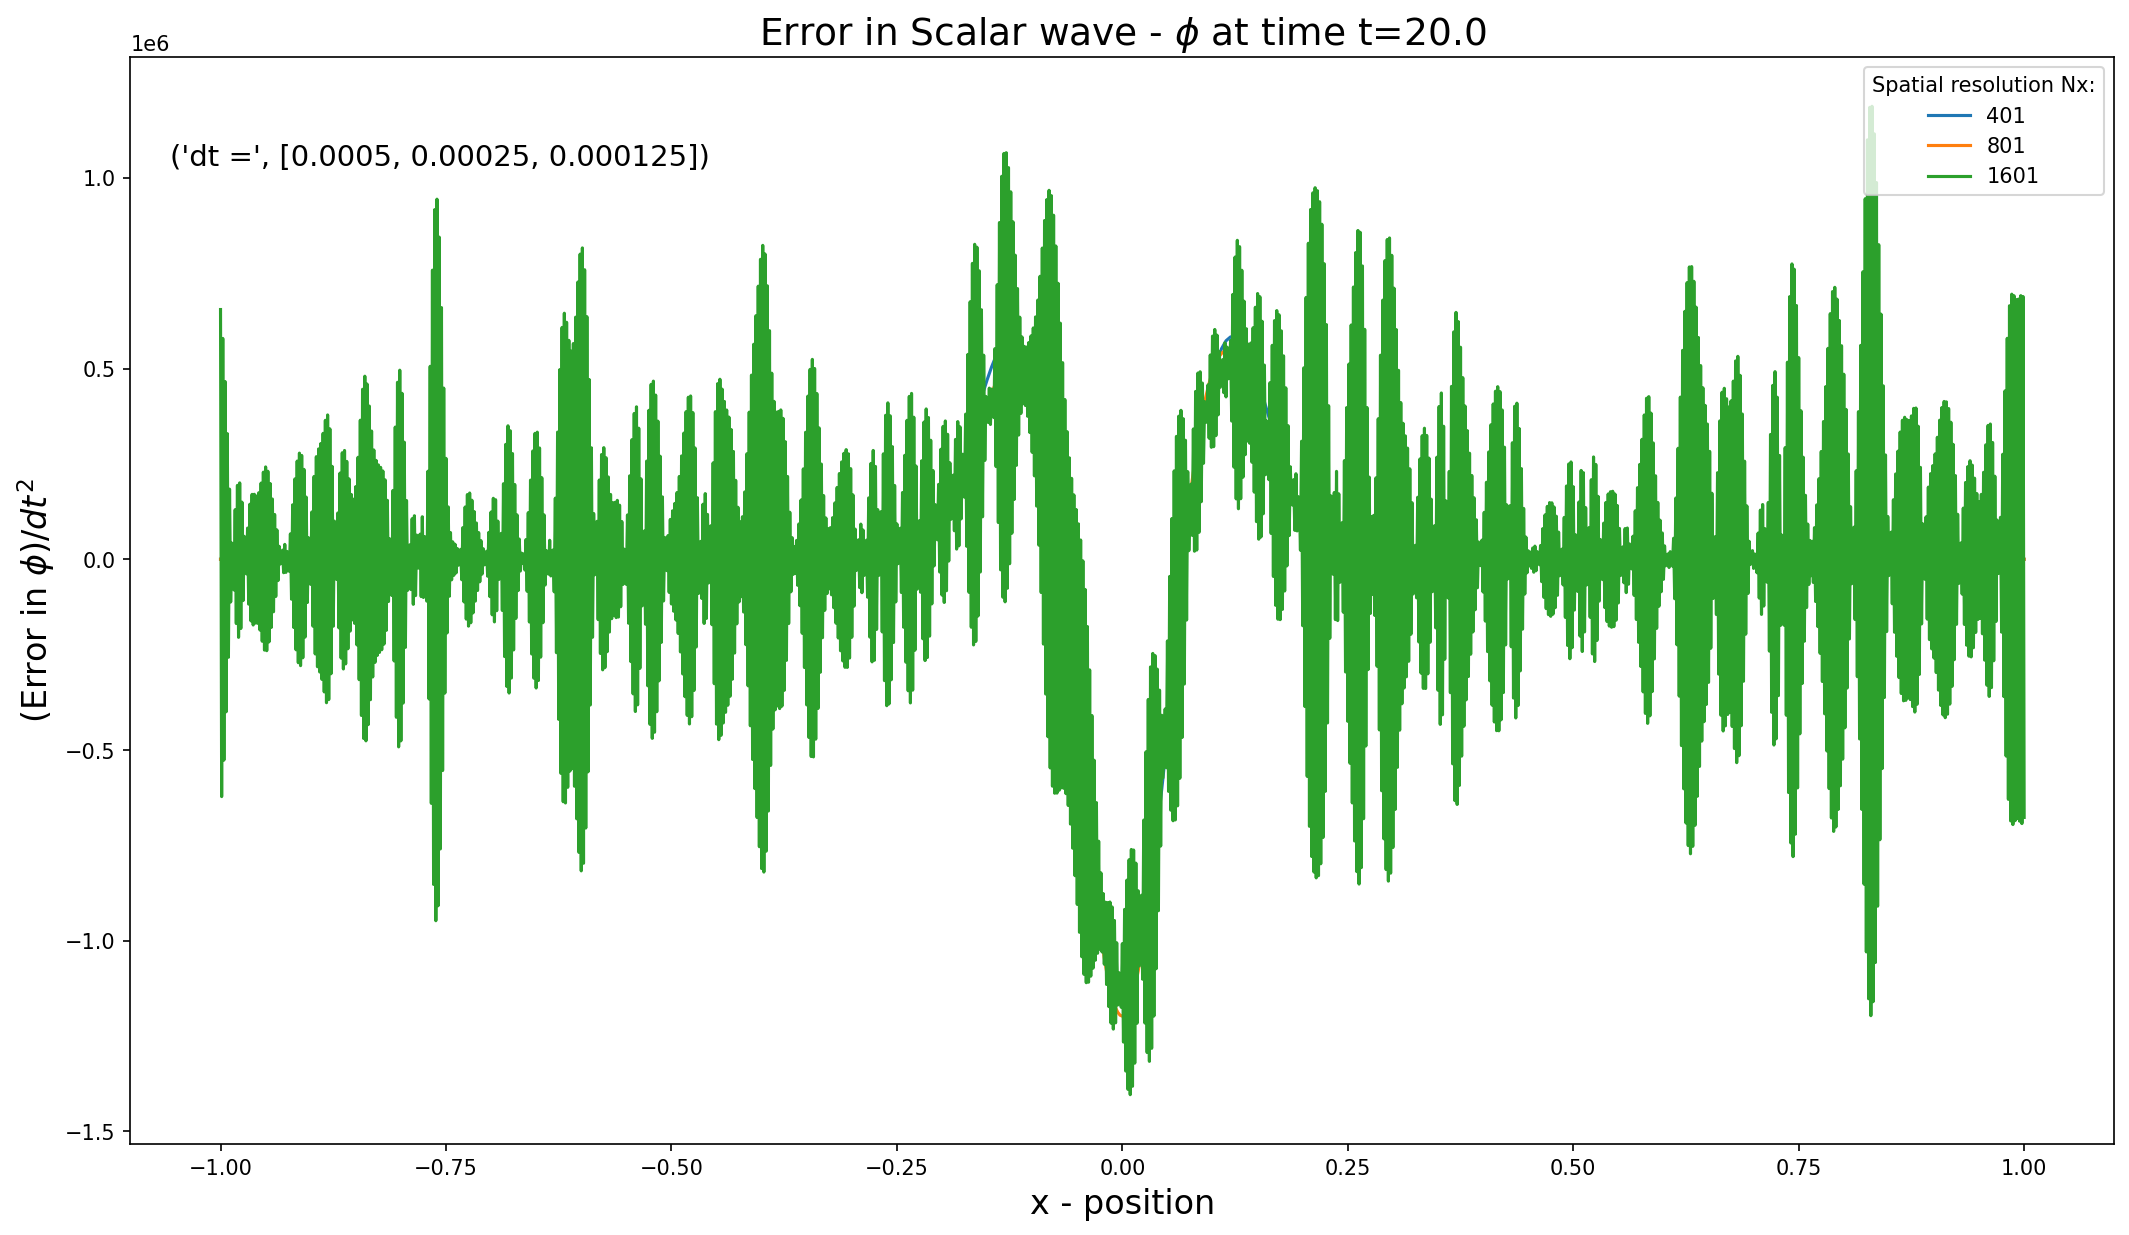

In [13]:
for i in range (total_crossings):
    plots1(r'Error in Scalar wave - $\phi$ at time t=%0.1f'%(crossing_times[i]),
      "x - position",r'(Error in $\phi$)/$dt^{2}$',
      var_x_f1,np.transpose(error_f1[i]),
      var_x_f2,np.transpose(error_f2[i]),
      var_x_f3,np.transpose(error_f3[i]),
      [Nx_f1,Nx_f2,Nx_f3],[dt_f1,dt_f2,dt_f3])

In [14]:
def plots2(title,x_label,y_label,x_param,y_param,i):
    fig_dpi = 100
    fig, ax = plt.subplots(figsize=(1280/fig_dpi,720/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    ax.axis([-1.1,+1.1,-1.5,1.5])
    plt.plot(x_param,y_param)
    plt.text(0.02, 0.95, 'Time = %.4f'%var_t_f1[i*two_full_crossing_iter_f1], transform=ax.transAxes)
    plt.show()

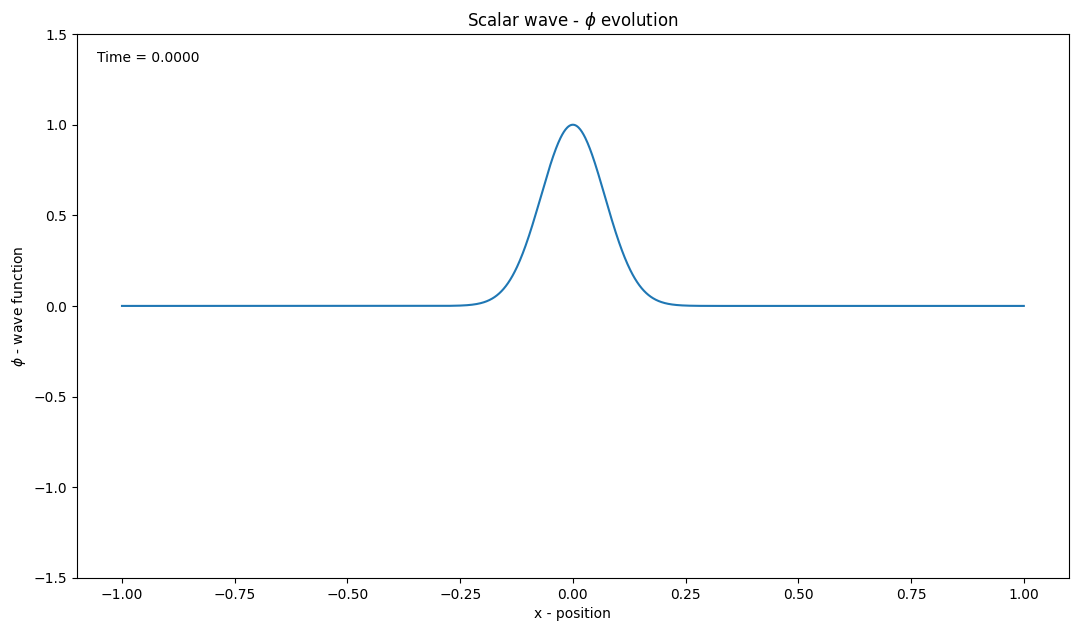

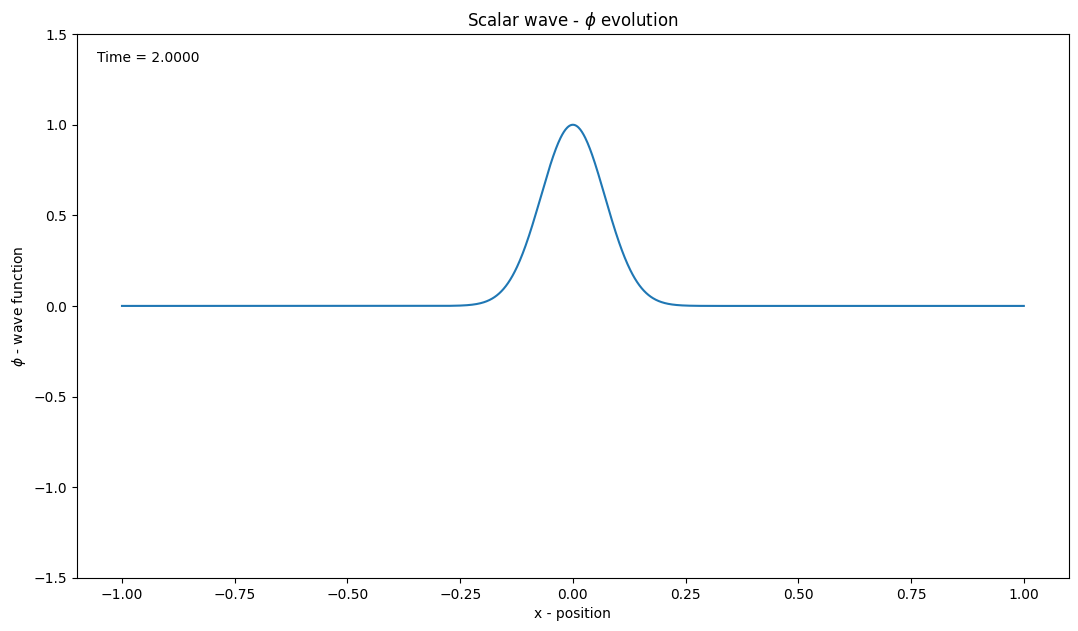

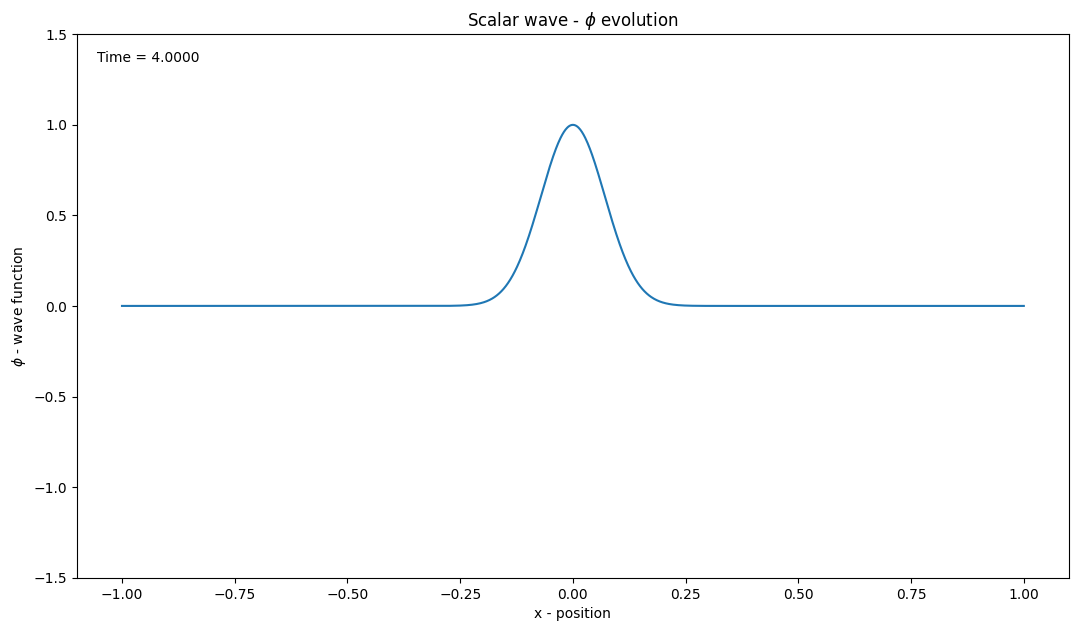

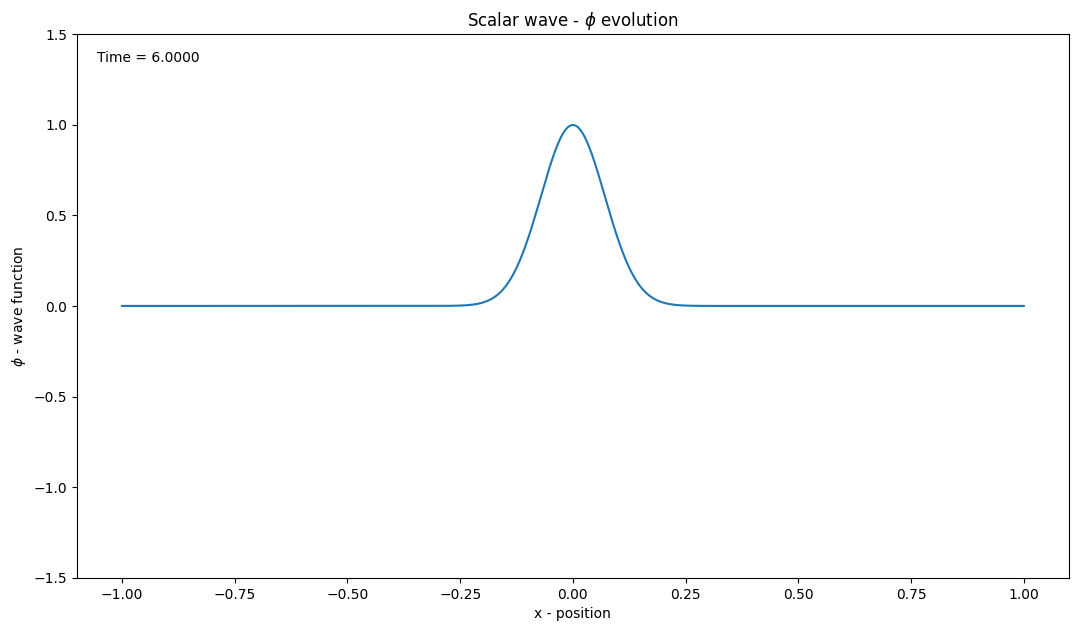

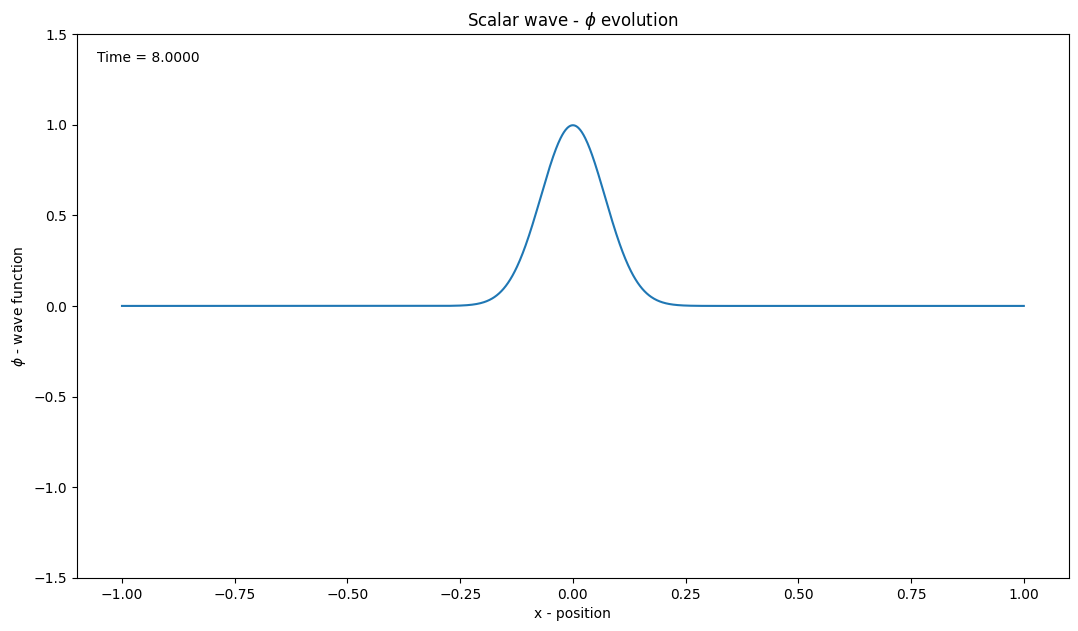

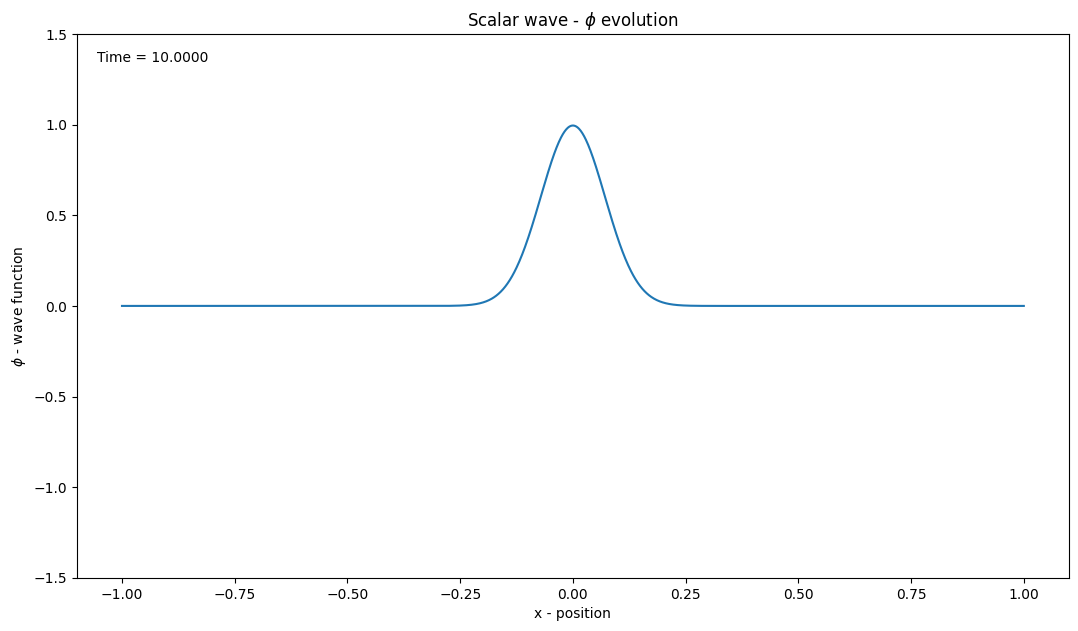

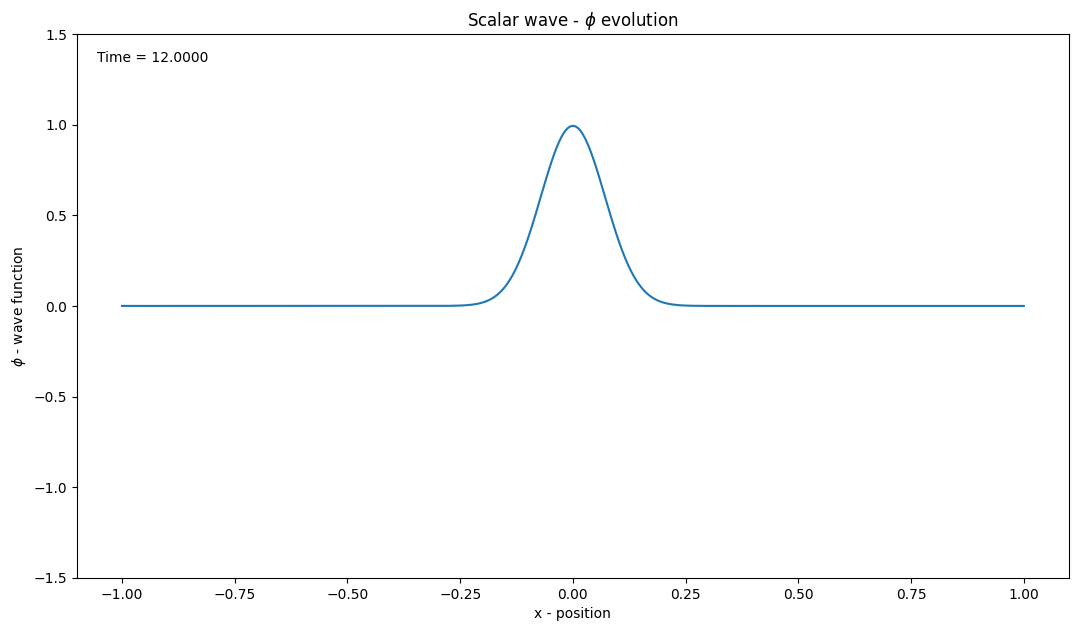

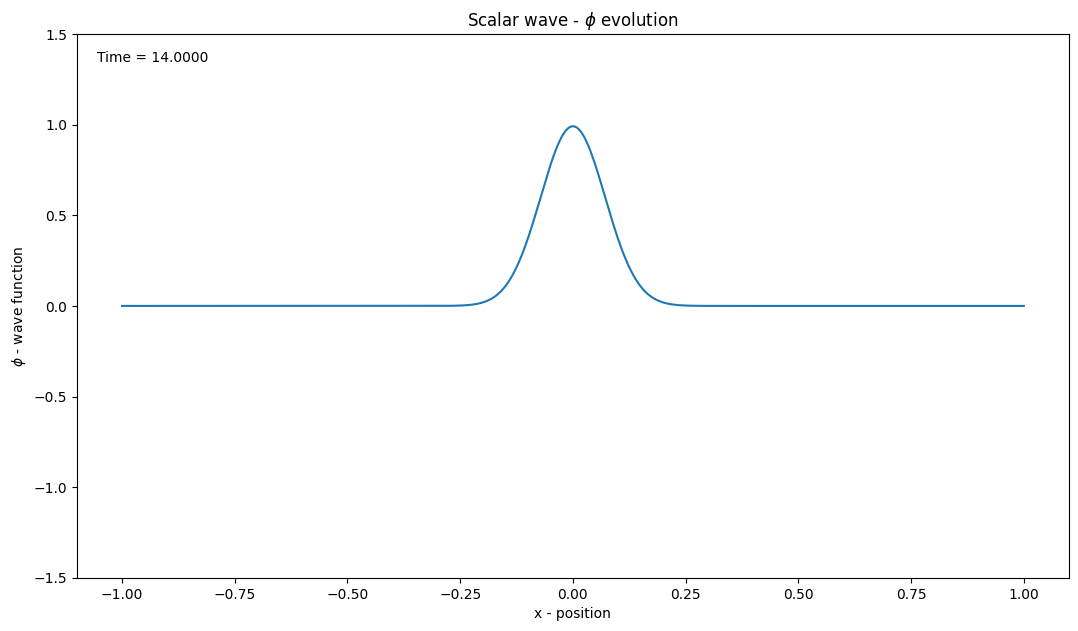

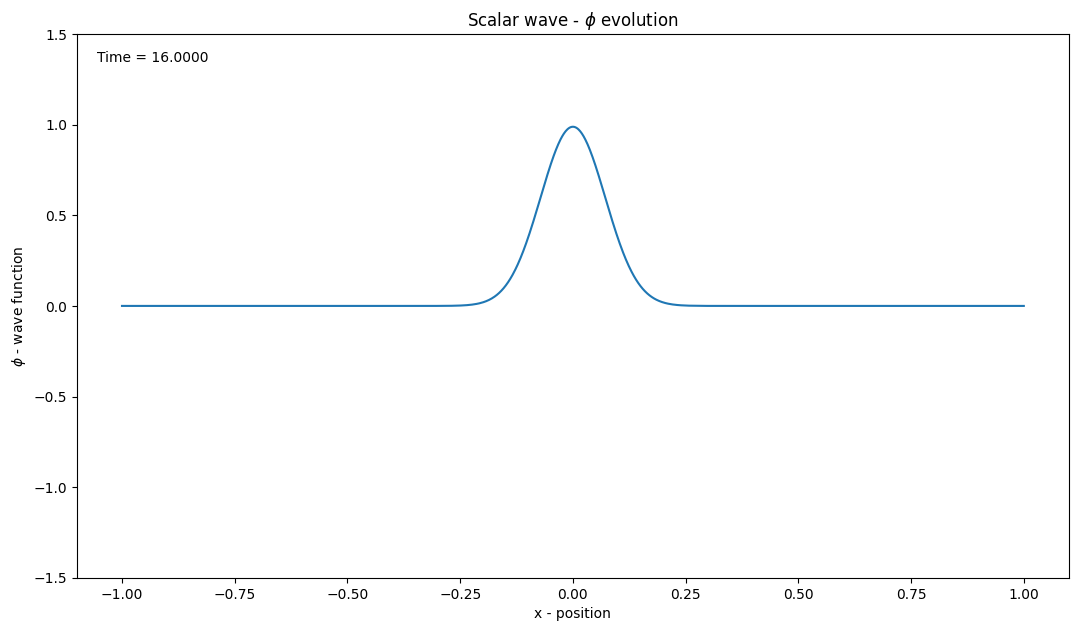

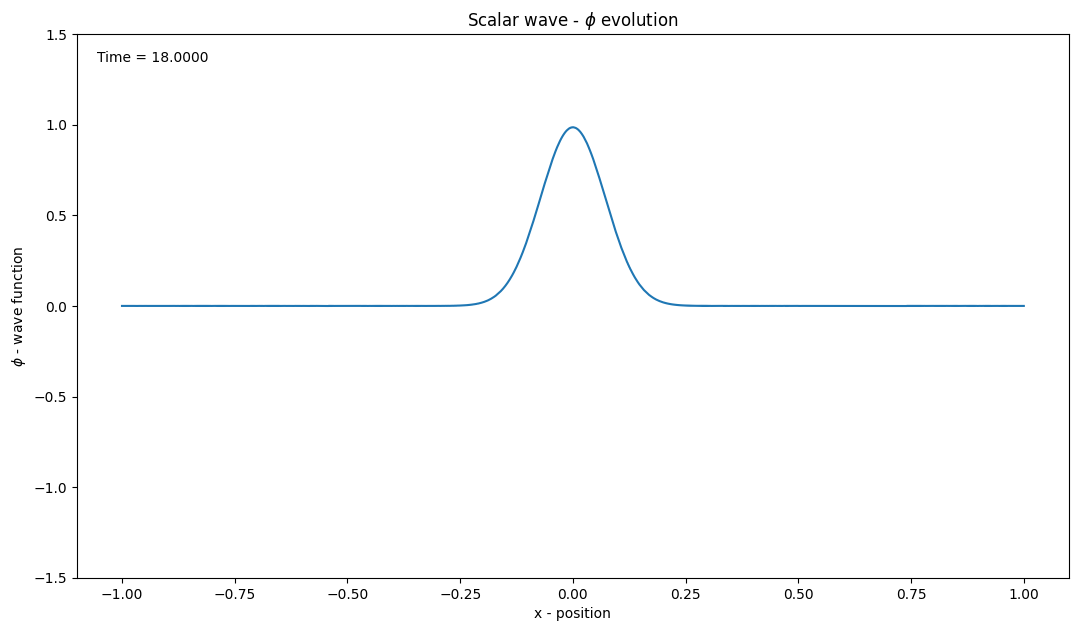

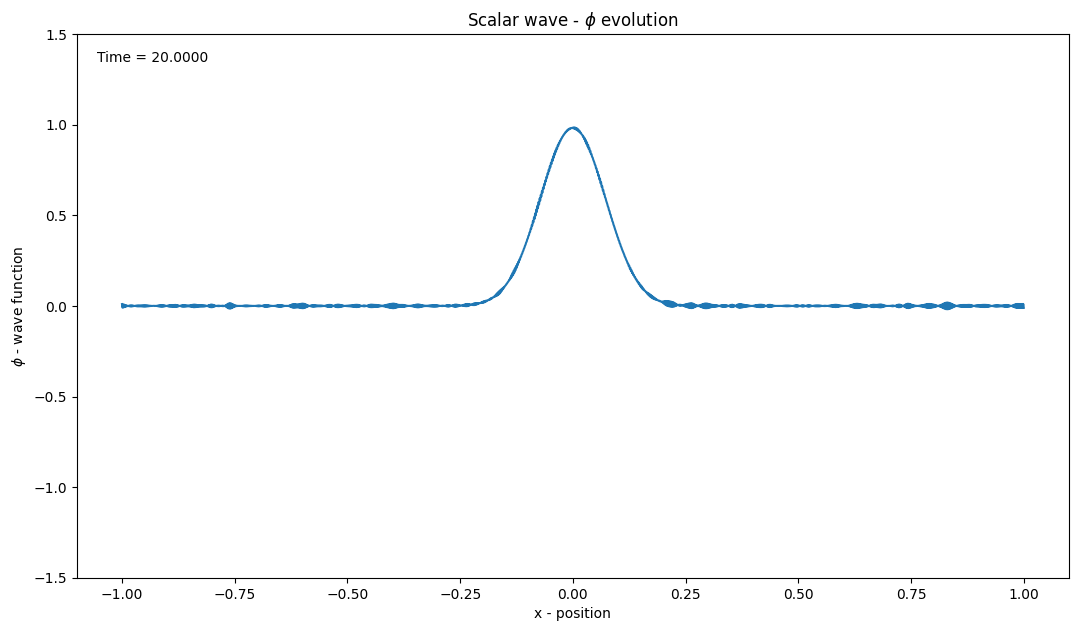

In [15]:
for i in range (total_crossings+1):
    plots2(r'Scalar wave - $\phi$ evolution',"x - position",r'$\phi$ - wave function',
          var_x_f3,phi_f3[i],i)

In [16]:
def integrate_simpson(h,param_y):
    t1,t2 = 0,0
    for i in range (1,len(param_y)-1): 
        if (i%2 == 1): #odd integers
            t1 = t1 + param_y[i]
            #print("t1[i]",i)
        #print(t1)
        if (i%2 == 0) : #even integers
            t2 = t2 + param_y[i]
            #print("t2[i]",i)
        #print(t2)
    integral = (h/3)*(param_y[0] + 4*t1 + 2*t2 + param_y[len(param_y)-1] )
    return integral

# Calculate l2 Norm
def calculate_l2_norm(Nx,dx,func):
    mod = np.zeros((len(func),Nx))
    l2_norm = np.zeros(len(func))
    for i in range (len(func)):
        mod[i] = np.sqrt((func[i])**2)
        l2_norm[i] = integrate_simpson(dx,mod[i])
    return l2_norm

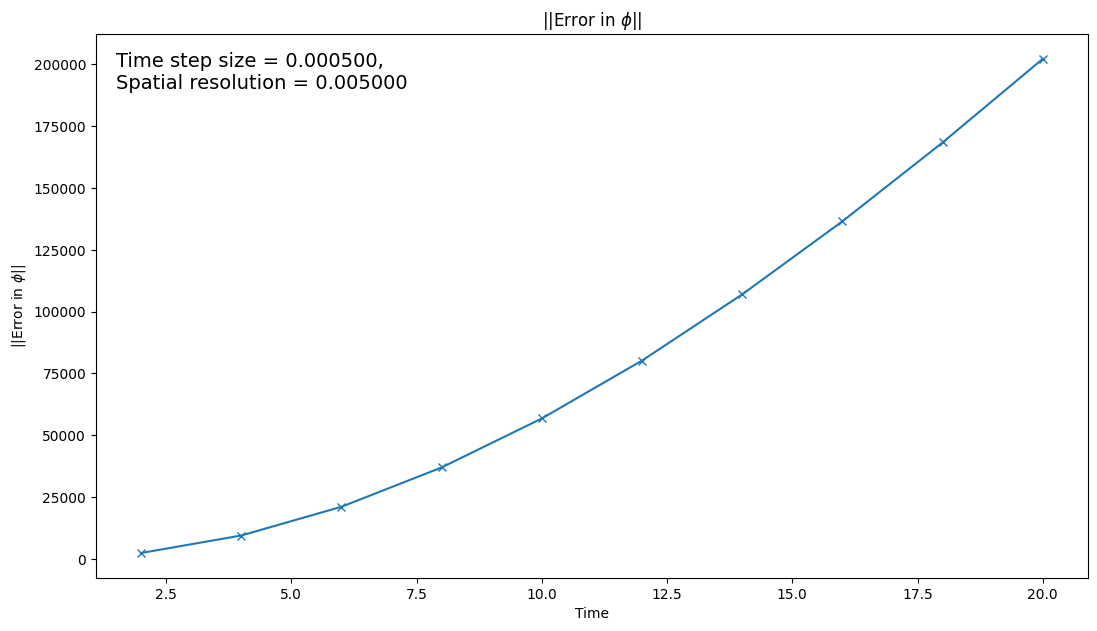

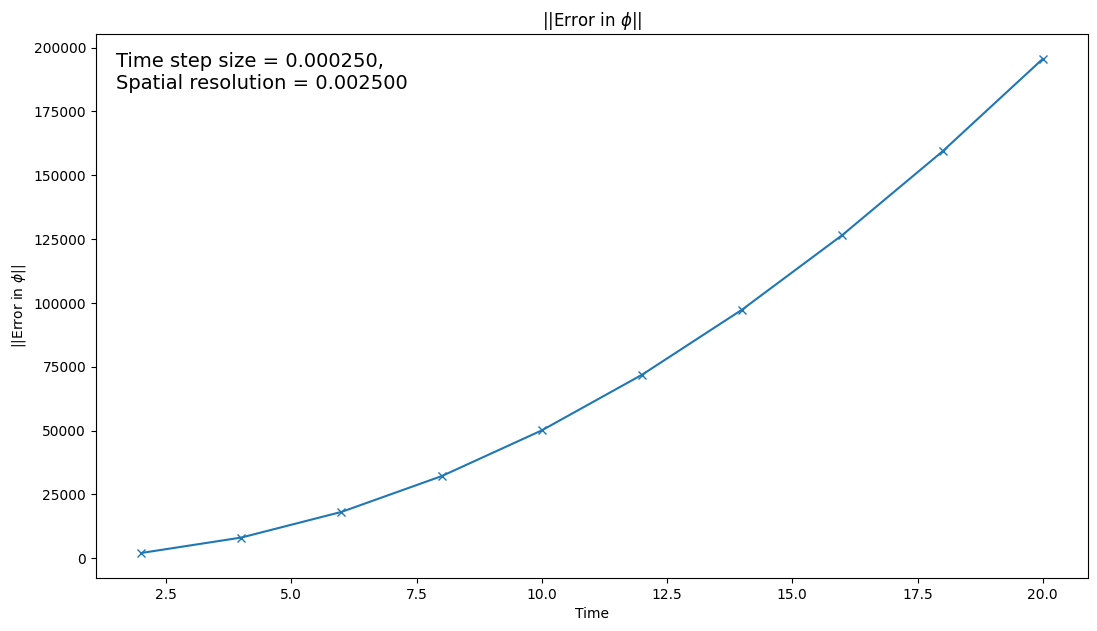

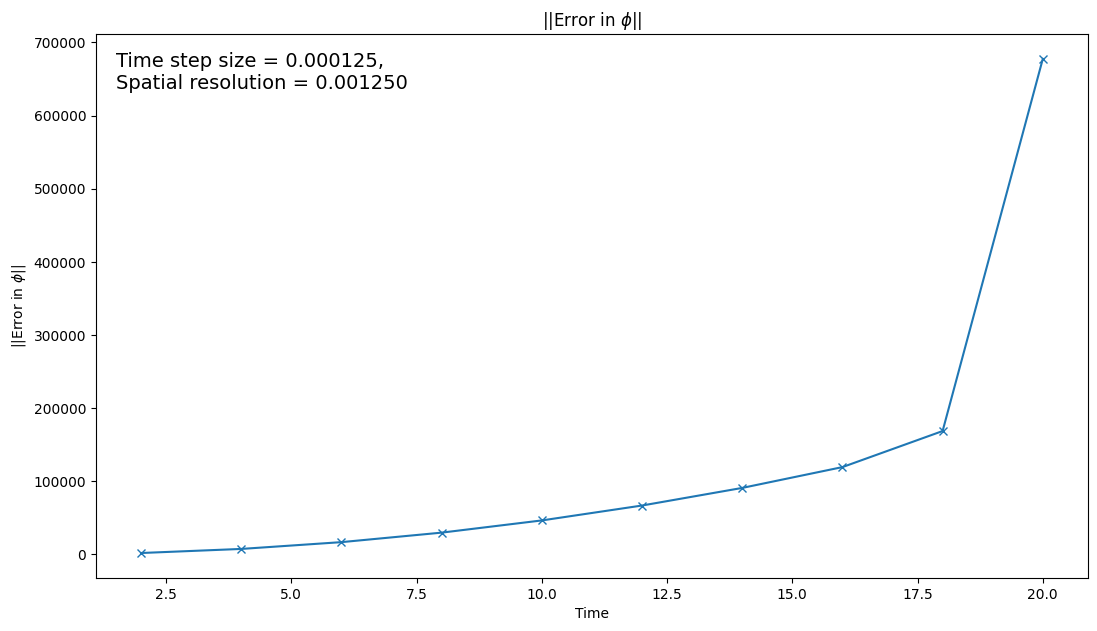

In [17]:
error_f1_l2norm = calculate_l2_norm(Nx_f1,dx_f1,error_f1)
error_f2_l2norm = calculate_l2_norm(Nx_f2,dx_f2,error_f2)
error_f3_l2norm = calculate_l2_norm(Nx_f3,dx_f3,error_f3)

def plots3(title,x_label,y_label,x_param,y_param,dt,dx):
    fig_dpi = 100
    fig, ax = plt.subplots(figsize=(1280/fig_dpi,720/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    #ax.axis([-1.1,+1.1,-1.5,1.5])
    plt.plot(x_param,y_param,'-x')
    plt.text(0.02, 0.90, 'Time step size = %.6f,\nSpatial resolution = %.6f'%(dt,dx),
             transform=ax.transAxes,fontsize=14)
    plt.show()

plots3(r'||Error in $\phi$||','Time','||Error in $\phi$||',
     crossing_times,error_f1_l2norm,dt_f1,dx_f1)
plots3(r'||Error in $\phi$||','Time','||Error in $\phi$||',
     crossing_times,error_f2_l2norm,dt_f2,dx_f2)
plots3(r'||Error in $\phi$||','Time','||Error in $\phi$||',
     crossing_times,error_f3_l2norm,dt_f3,dx_f3)

In [18]:
phi_1 = np.load("phi_1h,Nx=401,t=(0.0,2.0),x=(-1.0,1.0).npy")
phi_2 = np.load("phi_2h,Nx=801,t=(0.0,2.0),x=(-1.0,1.0).npy")
phi_3 = np.load("phi_4h,Nx=1601,t=(0.0,2.0),x=(-1.0,1.0).npy")

In [154]:
phi_3_r = np.zeros((len(phi_3),Nx_f1))
phi_2_r = np.zeros((len(phi_2),Nx_f1))

In [155]:
k = 0
for i in range (len(phi_3)):
    for j in range (0,Nx_f3,4):
        if (j<Nx_f3-1):
            phi_3_r[i][k] = (phi_3[i][j] + phi_3[i][j+1] + phi_3[i][j+2] + phi_3[i][j+3])/4
            k = k+1
            #print(j,k)
        else:
            k=0

In [156]:
k = 0
for i in range (len(phi_2)):
    for j in range (0,Nx_f2,2):
        if (j<Nx_f2-1):
            phi_2_r[i][k] = (phi_2[i][j] + phi_2[i][j+1])/2
            k = k+1
            #print(j,k)
        else:
            k=0

In [166]:
time_sample_size = 0.1
time_sample_length = 2.0
sample_times = np.arange(0,time_sample_length+time_sample_size,time_sample_size)
phi_1h = np.zeros((len(sample_times),Nx_f1))
phi_2h = np.zeros((len(sample_times),Nx_f1))
phi_4h = np.zeros((len(sample_times),Nx_f1))


In [167]:
j = 0
for i in range (0,int(two_full_crossing_iter_f1)+1,int(time_sample_size/dt_f1)):
    phi_1h[j] = phi_1[i]
    j = j+1
j = 0
for i in range (0,int(two_full_crossing_iter_f2)+1,int(time_sample_size/dt_f2)):
    phi_2h[j] = phi_2_r[i]
    j = j+1
j = 0
for i in range (0,int(two_full_crossing_iter_f3)+1,int(time_sample_size/dt_f3)):
    phi_4h[j] = phi_3_r[i]
    j = j+1

Convergence factor calculated by:

$$Convergence factor = \dfrac{||\phi_{2h}|| - ||\phi_{4h}||}{||\phi_{1h}|| - ||\phi_{2h}||}$$
$$ = \dfrac{e_{2h} - e_{4h}}{e_{1h} - e_{2h}}$$
$$ = \dfrac{(16 -4) A h^2}{(4-1) A h^2}$$
$$ = 4$$
$$Convergence.order = log_{2}(4) = 2$$

In [189]:
error_ratio = np.zeros((len(sample_times),Nx_f1))
convergence_factor = np.zeros(len(sample_times))
for i in range (len(sample_times)):
    error_ratio[i] = (phi_4h[i] - phi_2h[i])/(phi_2h[i] - phi_1h[i])

In [192]:
convergence_factor = calculate_l2_norm(Nx_f1,dx_f1,error_ratio)
convergence_order = np.log2(convergence_factor)

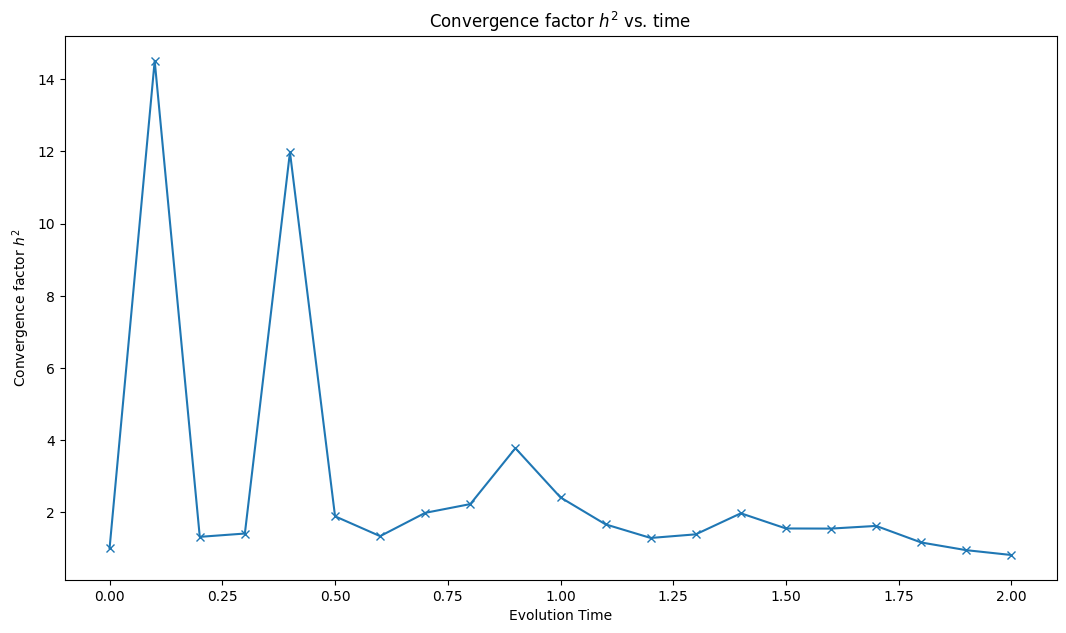

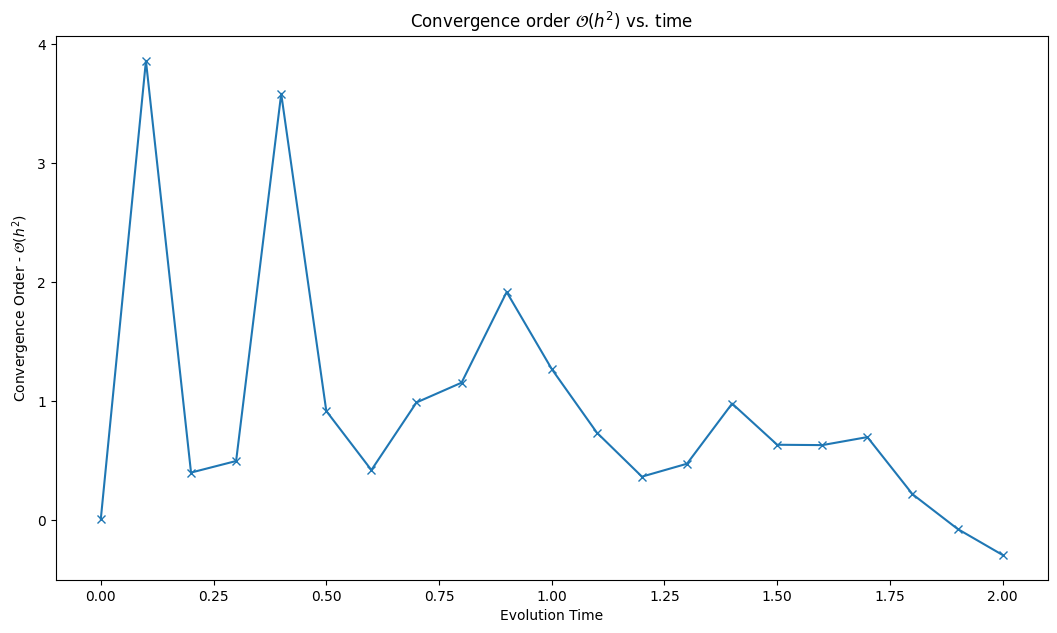

In [193]:
def plots4(title,x_label,y_label,x_param,y_param):
    fig_dpi = 100
    fig, ax = plt.subplots(figsize=(1280/fig_dpi,720/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    #plt.xlim(0,19)
    plt.plot(x_param,y_param,'-x')
    plt.show()
plots4(r'Convergence factor $h^2$ vs. time','Evolution Time',r'Convergence factor $h^2$',
     sample_times,convergence_factor)
plots4(r'Convergence order $\mathcal{O}(h^2)$ vs. time','Evolution Time',r'Convergence Order - $\mathcal{O}(h^2)$',
     sample_times,convergence_order)

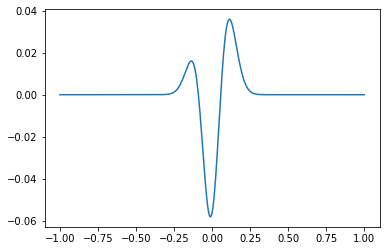

In [205]:
plt.plot(var_x_f1,phi_1[50]-phi_3_r[50])